In [ ]:
from google.colab import files
files.upload()


Saving COIN_hourly_1y_massive.csv to COIN_hourly_1y_massive.csv


{'COIN_hourly_1y_massive.csv': b'window_start,open,high,low,close,volume,transactions\n2024-12-09 09:00:00+00:00,336.02,339.19,333.65,334.68,93262,2641\n2024-12-09 10:00:00+00:00,334.59,337.77,334.59,337.01,44100,1087\n2024-12-09 11:00:00+00:00,336.56,337.2,333.95,335.91,43763,1488\n2024-12-09 12:00:00+00:00,335.99,338.79,334.75,338.7,133135,2692\n2024-12-09 13:00:00+00:00,338.5,340.19,334.89,338.98,225899,5691\n2024-12-09 14:00:00+00:00,338.88,340.45,329.35,332.5797,2657343,48023\n2024-12-09 15:00:00+00:00,332.51,333.5,313.42,316.68,4457714,83919\n2024-12-09 16:00:00+00:00,316.6,321.2299,313.6,317.97,1782065,36923\n2024-12-09 17:00:00+00:00,317.7978,320.64,314.13,314.45,1034202,23732\n2024-12-09 18:00:00+00:00,314.465,320.27,314.3301,318.275,787240,17230\n2024-12-09 19:00:00+00:00,318.2941,318.697,315.9,316.195,724057,15865\n2024-12-09 20:00:00+00:00,316.195,317.0,309.68,310.22,2725261,51326\n2024-12-09 21:00:00+00:00,310.52,315.05,308.5,314.84,263844,5847\n2024-12-09 22:00:00+00:00,3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

os.listdir("/content/drive/MyDrive")


['Colab Notebooks',
 'Classroom',
 'Civil Rights.gdoc',
 'Copy of Civil Rights.gdoc',
 'Hw.gdoc',
 'Untitled document (145).gdoc',
 'FINA3303_Investments_Spring2024_Diversification (1).gdoc',
 'FINA3303_Investments_Spring2024_Diversification.gdoc',
 'Nutrition 2 15.gsheet',
 'Untitled document (144).gdoc',
 'Copy of 2final.gdoc',
 '2 22.gdoc',
 'Untitled document (143).gdoc',
 'ResumeFinal2[34] (1).pdf',
 'cover letter doc.gdoc',
 '2final.gdoc',
 '3 16.gsheet',
 'Deib Proj.gdoc',
 'proposal.gdoc',
 'FINA3303_Investments_Spring2024_DividendDiscountModels.gdoc',
 'coverLetter.gdoc',
 'Untitled document (142).gdoc',
 'Untitled document (141).gdoc',
 'Copy of SMART Goals Worksheet.gdoc',
 'speech.gdoc',
 'interview notes.gdoc',
 'FINA3303_Investments_Spring2024_ManagingBondPortfolios.gdoc',
 'summary 24.gdoc',
 'article assignment.gsheet',
 'Untitled document (140).gdoc',
 'coop applications since 5 6.gsheet',
 'Max Stracher algo ps1.gdoc',
 'Untitled document (139).gdoc',
 'ps 4.gdoc',
 '

In [ ]:
import pandas as pd

btc_min = pd.read_csv(
    "/content/drive/MyDrive/BTCUSD_1min_1y_bitstamp.csv"
)

print(btc_min.shape)
print(btc_min.head())


(526000, 7)
    timestamp    open    high     low   close     volume  \
0  1733699640  100438  100500  100438  100500  15.332357   
1  1733699700  100509  100548  100472  100474   3.465534   
2  1733699760  100425  100425  100425  100425   0.000216   
3  1733699820  100426  100447  100426  100434   1.140574   
4  1733699880  100438  100461  100438  100461   1.411265   

                    datetime  
0  2024-12-08 23:14:00+00:00  
1  2024-12-08 23:15:00+00:00  
2  2024-12-08 23:16:00+00:00  
3  2024-12-08 23:17:00+00:00  
4  2024-12-08 23:18:00+00:00  


In [ ]:
import pandas as pd

# Ensure datetime is the index
btc_min = btc_min.copy()
btc_min["datetime"] = pd.to_datetime(btc_min["datetime"], utc=True)
btc_min = btc_min.set_index("datetime").sort_index()

# Keep only what we need
btc_min = btc_min[["open", "high", "low", "close", "volume"]]

btc_min.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 526000 entries, 2024-12-08 23:14:00+00:00 to 2025-12-08 23:13:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    526000 non-null  int64  
 1   high    526000 non-null  int64  
 2   low     526000 non-null  int64  
 3   close   526000 non-null  int64  
 4   volume  526000 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 24.1 MB


In [ ]:
btc_hr = btc_min.resample("1H").agg({
    "open": "first",
    "high": "max",
    "low": "min",
    "close": "last",
    "volume": "sum"
})

# Drop partial hours
btc_hr = btc_hr.dropna()

print(btc_hr.head())
print("Hourly BTC rows:", len(btc_hr))


                             open    high     low   close      volume
datetime                                                             
2024-12-08 23:00:00+00:00  100438  101407  100425  101204   92.537013
2024-12-09 00:00:00+00:00  101188  101271   99420   99687  151.142080
2024-12-09 01:00:00+00:00   99709   99898   99470   99623   44.833508
2024-12-09 02:00:00+00:00   99599   99782   99097   99244   23.796228
2024-12-09 03:00:00+00:00   99220   99407   98528   99162   39.081323
Hourly BTC rows: 8761


/tmp/ipython-input-1487586618.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  btc_hr = btc_min.resample("1H").agg({


In [ ]:
btc_hr.index.min(), btc_hr.index.max()


(Timestamp('2024-12-08 23:00:00+0000', tz='UTC'),
 Timestamp('2025-12-08 23:00:00+0000', tz='UTC'))

In [ ]:
import os

# show only CSVs in Drive root
[f for f in os.listdir("/content/drive/MyDrive") if f.endswith(".csv")]


['BTCUSD_1min_1y_bitstamp.csv', 'COIN_hourly_1y_massive-1.csv']

In [ ]:
import pandas as pd
import os

# Sanity check: show the CSVs in Drive root
print(os.listdir("/content/drive/MyDrive"))

# Correct path for the COIN file
coin_path = "/content/drive/MyDrive/COIN_hourly_1y_massive-1.csv"

# Load COIN hourly data
coin_hr = pd.read_csv(coin_path)

print("COIN shape:", coin_hr.shape)
print(coin_hr.head())
print(coin_hr.columns)


['Colab Notebooks', 'Classroom', 'Civil Rights.gdoc', 'Copy of Civil Rights.gdoc', 'Hw.gdoc', 'Untitled document (145).gdoc', 'FINA3303_Investments_Spring2024_Diversification (1).gdoc', 'FINA3303_Investments_Spring2024_Diversification.gdoc', 'Nutrition 2 15.gsheet', 'Untitled document (144).gdoc', 'Copy of 2final.gdoc', '2 22.gdoc', 'Untitled document (143).gdoc', 'ResumeFinal2[34] (1).pdf', 'cover letter doc.gdoc', '2final.gdoc', '3 16.gsheet', 'Deib Proj.gdoc', 'proposal.gdoc', 'FINA3303_Investments_Spring2024_DividendDiscountModels.gdoc', 'coverLetter.gdoc', 'Untitled document (142).gdoc', 'Untitled document (141).gdoc', 'Copy of SMART Goals Worksheet.gdoc', 'speech.gdoc', 'interview notes.gdoc', 'FINA3303_Investments_Spring2024_ManagingBondPortfolios.gdoc', 'summary 24.gdoc', 'article assignment.gsheet', 'Untitled document (140).gdoc', 'coop applications since 5 6.gsheet', 'Max Stracher algo ps1.gdoc', 'Untitled document (139).gdoc', 'ps 4.gdoc', 'Untitled document (138).gdoc', 'Un

In [ ]:
# -------------------------------
# 1. Clean COIN hourly data
# -------------------------------

coin_hr = coin_hr.copy()

# Parse datetime
coin_hr["datetime"] = pd.to_datetime(coin_hr["window_start"], utc=True)

# Set index
coin_hr = coin_hr.set_index("datetime").sort_index()

# Keep OHLCV only (transactions optional)
coin_hr = coin_hr[["open", "high", "low", "close", "volume"]]

coin_hr.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3969 entries, 2024-12-09 09:00:00+00:00 to 2025-12-06 00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3969 non-null   float64
 1   high    3969 non-null   float64
 2   low     3969 non-null   float64
 3   close   3969 non-null   float64
 4   volume  3969 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 186.0 KB


In [ ]:
# -------------------------------
# 2. Align BTC to COIN hours (KEY STEP)
# -------------------------------

# Inner join = keep only hours when COIN trades
merged = coin_hr.join(
    btc_hr.add_prefix("btc_"),
    how="inner"
)

print(merged.head())
print("Merged rows:", len(merged))


                             open    high     low   close  volume  btc_open  \
datetime                                                                      
2024-12-09 09:00:00+00:00  336.02  339.19  333.65  334.68   93262     98922   
2024-12-09 10:00:00+00:00  334.59  337.77  334.59  337.01   44100     98423   
2024-12-09 11:00:00+00:00  336.56  337.20  333.95  335.91   43763     98709   
2024-12-09 12:00:00+00:00  335.99  338.79  334.75  338.70  133135     98043   
2024-12-09 13:00:00+00:00  338.50  340.19  334.89  338.98  225899     98575   

                           btc_high  btc_low  btc_close  btc_volume  
datetime                                                             
2024-12-09 09:00:00+00:00     99103    98423      98423   48.367367  
2024-12-09 10:00:00+00:00     98769    98273      98710   64.673235  
2024-12-09 11:00:00+00:00     98710    98033      98066   42.147474  
2024-12-09 12:00:00+00:00     98587    97931      98575   33.492788  
2024-12-09 13:00:00+00:00 

In [ ]:
# Date range check
print(merged.index.min(), merged.index.max())

# Weekend check (should be none)
print(merged.index.dayofweek.value_counts().sort_index())


2024-12-09 09:00:00+00:00 2025-12-06 00:00:00+00:00
datetime
0    752
1    826
2    801
3    779
4    794
5     17
Name: count, dtype: int64


In [ ]:
import pytz

# Work on a copy
merged_mkt = merged.copy()

# Convert UTC → US/Eastern
merged_mkt = merged_mkt.tz_convert("US/Eastern")

# Keep weekdays only (Mon=0 ... Fri=4)
merged_mkt = merged_mkt[merged_mkt.index.dayofweek < 5]

# Keep regular market hours: 9:30–16:00 ET
merged_mkt = merged_mkt.between_time("09:30", "16:00")

# Convert back to UTC (recommended for modeling)
merged_mkt = merged_mkt.tz_convert("UTC")

print("Final rows:", len(merged_mkt))
print(merged_mkt.head())


Final rows: 1737
                               open      high       low    close   volume  \
datetime                                                                    
2024-12-09 15:00:00+00:00  332.5100  333.5000  313.4200  316.680  4457714   
2024-12-09 16:00:00+00:00  316.6000  321.2299  313.6000  317.970  1782065   
2024-12-09 17:00:00+00:00  317.7978  320.6400  314.1300  314.450  1034202   
2024-12-09 18:00:00+00:00  314.4650  320.2700  314.3301  318.275   787240   
2024-12-09 19:00:00+00:00  318.2941  318.6970  315.9000  316.195   724057   

                           btc_open  btc_high  btc_low  btc_close  btc_volume  
datetime                                                                       
2024-12-09 15:00:00+00:00    100365    100438    97493      97822  340.961574  
2024-12-09 16:00:00+00:00     97714     98340    97447      97812  111.095789  
2024-12-09 17:00:00+00:00     97806     98202    97341      97341   48.200577  
2024-12-09 18:00:00+00:00     97341     982

In [ ]:
# Should ONLY be Mon–Fri
print(merged_mkt.index.dayofweek.value_counts().sort_index())

# Spot-check times (UTC will look like ~14:30–21:00 depending on DST)
merged_mkt.index[:5]


datetime
0    336
1    362
2    350
3    341
4    348
Name: count, dtype: int64


DatetimeIndex(['2024-12-09 15:00:00+00:00', '2024-12-09 16:00:00+00:00',
               '2024-12-09 17:00:00+00:00', '2024-12-09 18:00:00+00:00',
               '2024-12-09 19:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', freq=None)

In [ ]:
# ==============================
# FULL PIPELINE: DATA → MODEL
# ==============================

import os
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ------------------------------
# 1. LOAD DATA FROM DRIVE
# ------------------------------
btc_path  = "/content/drive/MyDrive/BTCUSD_1min_1y_bitstamp.csv"
coin_path = "/content/drive/MyDrive/COIN_hourly_1y_massive-1.csv"

btc_min  = pd.read_csv(btc_path)
coin_hr  = pd.read_csv(coin_path)

# ------------------------------
# 2. CLEAN BTC MINUTE → HOURLY
# ------------------------------
btc_min["datetime"] = pd.to_datetime(btc_min["datetime"], utc=True)
btc_min = btc_min.set_index("datetime").sort_index()
btc_min = btc_min[["open", "high", "low", "close", "volume"]]

btc_hr = btc_min.resample("1h").agg({
    "open": "first",
    "high": "max",
    "low": "min",
    "close": "last",
    "volume": "sum"
}).dropna()

# ------------------------------
# 3. CLEAN COIN HOURLY
# ------------------------------
coin_hr["datetime"] = pd.to_datetime(coin_hr["window_start"], utc=True)
coin_hr = coin_hr.set_index("datetime").sort_index()
coin_hr = coin_hr[["open", "high", "low", "close", "volume"]]

# ------------------------------
# 4. ALIGN BTC + COIN
# ------------------------------
merged = coin_hr.join(
    btc_hr.add_prefix("btc_"),
    how="inner"
)

# ------------------------------
# 5. MARKET HOURS FILTER
# ------------------------------
merged = merged.tz_convert("US/Eastern")
merged = merged[merged.index.dayofweek < 5]          # Mon–Fri
merged = merged.between_time("09:30", "16:00")       # Market hours
merged = merged.tz_convert("UTC")

# ------------------------------
# 6. FEATURE ENGINEERING (OLS-APPROVED)
# ------------------------------
df = merged.copy()

df["coin_ret_1h"] = np.log(df["close"]) - np.log(df["close"].shift(1))
df["btc_ret_1h"]  = np.log(df["btc_close"]) - np.log(df["btc_close"].shift(1))

df["coin_ret_lag_1"] = df["coin_ret_1h"].shift(1)
df["coin_ret_lag_2"] = df["coin_ret_1h"].shift(2)
df["coin_ret_lag_3"] = df["coin_ret_1h"].shift(3)

df["btc_ret_lag_1"] = df["btc_ret_1h"].shift(1)
df["btc_ret_lag_2"] = df["btc_ret_1h"].shift(2)

df["coin_vol_6h"] = df["coin_ret_1h"].rolling(6).std()
df["btc_vol_6h"]  = df["btc_ret_1h"].rolling(6).std()

df["coin_minus_btc"] = df["coin_ret_1h"] - df["btc_ret_1h"]

# Target
df["y_ret_1h"] = df["coin_ret_1h"].shift(-1)

df = df.dropna()

# ------------------------------
# 7. TRAIN / TEST SPLIT (TIME SERIES)
# ------------------------------
feature_cols = [
    "coin_ret_1h",
    "coin_ret_lag_1",
    "coin_ret_lag_2",
    "coin_ret_lag_3",
    "btc_ret_1h",
    "btc_ret_lag_1",
    "btc_ret_lag_2",
    "coin_vol_6h",
    "btc_vol_6h",
    "coin_minus_btc"
]

X = df[feature_cols]
y = df["y_ret_1h"]

split = int(0.7 * len(df))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# ------------------------------
# 8. XGBOOST MODEL (BASELINE ARCH)
# ------------------------------
xgb = XGBRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)

xgb.fit(X_train, y_train)

# ------------------------------
# 9. EVALUATION
# ------------------------------
y_pred = xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
directional_acc = (np.sign(y_pred) == np.sign(y_test.values)).mean()

print(f"Observations: {len(df)}")
print(f"RMSE: {rmse:.6f}")
print(f"R²: {r2:.6f}")
print(f"Directional accuracy: {directional_acc:.3%}")

# ------------------------------
# 10. FEATURE IMPORTANCE
# ------------------------------
importances = pd.Series(
    xgb.feature_importances_,
    index=feature_cols
).sort_values(ascending=False)

print("\nFeature importance:")
print(importances)


Observations: 1730
RMSE: 0.014854
R²: -0.172932
Directional accuracy: 49.133%

Feature importance:
btc_ret_lag_2     0.112754
coin_vol_6h       0.109804
btc_ret_1h        0.107552
btc_ret_lag_1     0.105070
btc_vol_6h        0.103763
coin_ret_lag_2    0.096086
coin_minus_btc    0.095592
coin_ret_1h       0.094122
coin_ret_lag_1    0.087866
coin_ret_lag_3    0.087391
dtype: float32


In [ ]:
# ===============================
# RESTRUCTURED MODEL (CLASSIFIER)
# Aim: >50% accuracy
# ===============================

import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------------
# Feature engineering (same core set)
# -------------------------------
df = merged_mkt.copy()

df["coin_ret_1h"] = np.log(df["close"]) - np.log(df["close"].shift(1))
df["btc_ret_1h"]  = np.log(df["btc_close"]) - np.log(df["btc_close"].shift(1))

df["coin_ret_lag_1"] = df["coin_ret_1h"].shift(1)
df["coin_ret_lag_2"] = df["coin_ret_1h"].shift(2)
df["coin_ret_lag_3"] = df["coin_ret_1h"].shift(3)

df["btc_ret_lag_1"] = df["btc_ret_1h"].shift(1)
df["btc_ret_lag_2"] = df["btc_ret_1h"].shift(2)

df["coin_vol_6h"] = df["coin_ret_1h"].rolling(6).std()
df["btc_vol_6h"]  = df["btc_ret_1h"].rolling(6).std()

df["coin_minus_btc"] = df["coin_ret_1h"] - df["btc_ret_1h"]

# -------------------------------
# NEW TARGET: large move classifier
# -------------------------------
df["future_abs_ret"] = df["coin_ret_1h"].shift(-1).abs()

# Rolling threshold (adaptive)
df["move_threshold"] = df["future_abs_ret"].rolling(50).median()

df["y_large_move"] = (df["future_abs_ret"] > df["move_threshold"]).astype(int)

df = df.dropna()

# -------------------------------
# Feature set
# -------------------------------
feature_cols = [
    "coin_ret_1h",
    "coin_ret_lag_1",
    "coin_ret_lag_2",
    "coin_ret_lag_3",
    "btc_ret_1h",
    "btc_ret_lag_1",
    "btc_ret_lag_2",
    "coin_vol_6h",
    "btc_vol_6h",
    "coin_minus_btc"
]

X = df[feature_cols]
y = df["y_large_move"]

# -------------------------------
# Time-based split
# -------------------------------
split = int(0.7 * len(df))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# -------------------------------
# XGBoost Classifier (conservative)
# -------------------------------
xgb_clf = XGBClassifier(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

xgb_clf.fit(X_train, y_train)

# -------------------------------
# Evaluation
# -------------------------------
y_pred = xgb_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.3%}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -------------------------------
# Feature importance
# -------------------------------
imp = pd.Series(
    xgb_clf.feature_importances_,
    index=feature_cols
).sort_values(ascending=False)

print("\nFeature importance:")
print(imp)


Accuracy: 53.057%

Confusion Matrix:
[[144 116]
 [122 125]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.55      0.55       260
           1       0.52      0.51      0.51       247

    accuracy                           0.53       507
   macro avg       0.53      0.53      0.53       507
weighted avg       0.53      0.53      0.53       507


Feature importance:
coin_ret_1h       0.109446
coin_minus_btc    0.105995
coin_ret_lag_3    0.101725
btc_ret_1h        0.101505
btc_vol_6h        0.101095
btc_ret_lag_1     0.098517
coin_vol_6h       0.098061
btc_ret_lag_2     0.097133
coin_ret_lag_1    0.096237
coin_ret_lag_2    0.090287
dtype: float32


In [ ]:
# ===============================
# ANN CLASSIFIER (same task as XGB)
# ===============================

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# -------------------------------
# Feature engineering (SAME AS XGB)
# -------------------------------
df = merged_mkt.copy()

df["coin_ret_1h"] = np.log(df["close"]) - np.log(df["close"].shift(1))
df["btc_ret_1h"]  = np.log(df["btc_close"]) - np.log(df["btc_close"].shift(1))

df["coin_ret_lag_1"] = df["coin_ret_1h"].shift(1)
df["coin_ret_lag_2"] = df["coin_ret_1h"].shift(2)
df["coin_ret_lag_3"] = df["coin_ret_1h"].shift(3)

df["btc_ret_lag_1"] = df["btc_ret_1h"].shift(1)
df["btc_ret_lag_2"] = df["btc_ret_1h"].shift(2)

df["coin_vol_6h"] = df["coin_ret_1h"].rolling(6).std()
df["btc_vol_6h"]  = df["btc_ret_1h"].rolling(6).std()

df["coin_minus_btc"] = df["coin_ret_1h"] - df["btc_ret_1h"]

# -------------------------------
# Target: large move classifier
# -------------------------------
df["future_abs_ret"] = df["coin_ret_1h"].shift(-1).abs()
df["move_threshold"] = df["future_abs_ret"].rolling(50).median()
df["y_large_move"] = (df["future_abs_ret"] > df["move_threshold"]).astype(int)

df = df.dropna()

# -------------------------------
# Feature matrix
# -------------------------------
feature_cols = [
    "coin_ret_1h",
    "coin_ret_lag_1",
    "coin_ret_lag_2",
    "coin_ret_lag_3",
    "btc_ret_1h",
    "btc_ret_lag_1",
    "btc_ret_lag_2",
    "coin_vol_6h",
    "btc_vol_6h",
    "coin_minus_btc"
]

X = df[feature_cols].values
y = df["y_large_move"].values

# -------------------------------
# Train / test split (time-based)
# -------------------------------
split = int(0.7 * len(df))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# -------------------------------
# Scale features (CRITICAL for ANN)
# -------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# -------------------------------
# ANN architecture (very deliberate)
# -------------------------------
model = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# -------------------------------
# Training with early stopping
# -------------------------------
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

# -------------------------------
# Evaluation
# -------------------------------
y_prob = model.predict(X_test).ravel()
y_pred = (y_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.3%}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Accuracy: 54.241%

Confusion Matrix:
[[140 120]
 [112 135]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       260
           1       0.53      0.55      0.54       247

    accuracy                           0.54       507
   macro avg       0.54      0.54      0.54       507
weighted avg       0.54      0.54      0.54       507



In [ ]:
# ================================
# RANDOM FOREST CLASSIFIER
# (Same task + features as XGB / ANN)
# ================================

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------------
# Feature engineering (SAME)
# -------------------------------
df = merged_mkt.copy()

df["coin_ret_1h"] = np.log(df["close"]) - np.log(df["close"].shift(1))
df["btc_ret_1h"]  = np.log(df["btc_close"]) - np.log(df["btc_close"].shift(1))

df["coin_ret_lag_1"] = df["coin_ret_1h"].shift(1)
df["coin_ret_lag_2"] = df["coin_ret_1h"].shift(2)
df["coin_ret_lag_3"] = df["coin_ret_1h"].shift(3)

df["btc_ret_lag_1"] = df["btc_ret_1h"].shift(1)
df["btc_ret_lag_2"] = df["btc_ret_1h"].shift(2)

df["coin_vol_6h"] = df["coin_ret_1h"].rolling(6).std()
df["btc_vol_6h"]  = df["btc_ret_1h"].rolling(6).std()

df["coin_minus_btc"] = df["coin_ret_1h"] - df["btc_ret_1h"]

# -------------------------------
# Target: large move classifier
# -------------------------------
df["future_abs_ret"] = df["coin_ret_1h"].shift(-1).abs()
df["move_threshold"] = df["future_abs_ret"].rolling(50).median()
df["y_large_move"] = (df["future_abs_ret"] > df["move_threshold"]).astype(int)

df = df.dropna()

# -------------------------------
# Feature matrix
# -------------------------------
feature_cols = [
    "coin_ret_1h",
    "coin_ret_lag_1",
    "coin_ret_lag_2",
    "coin_ret_lag_3",
    "btc_ret_1h",
    "btc_ret_lag_1",
    "btc_ret_lag_2",
    "coin_vol_6h",
    "btc_vol_6h",
    "coin_minus_btc"
]

X = df[feature_cols]
y = df["y_large_move"]

# -------------------------------
# Time-based split
# -------------------------------
split = int(0.7 * len(df))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# -------------------------------
# Random Forest (conservative)
# -------------------------------
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=6,
    min_samples_leaf=20,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)

# -------------------------------
# Evaluation
# -------------------------------
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.3%}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -------------------------------
# Feature importance
# -------------------------------
imp = pd.Series(
    rf.feature_importances_,
    index=feature_cols
).sort_values(ascending=False)

print("\nFeature importance:")
print(imp)


Accuracy: 52.465%

Confusion Matrix:
[[148 112]
 [129 118]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.57      0.55       260
           1       0.51      0.48      0.49       247

    accuracy                           0.52       507
   macro avg       0.52      0.52      0.52       507
weighted avg       0.52      0.52      0.52       507


Feature importance:
coin_minus_btc    0.137756
coin_ret_1h       0.135037
btc_vol_6h        0.120226
coin_ret_lag_3    0.114043
btc_ret_1h        0.094456
coin_vol_6h       0.092807
btc_ret_lag_1     0.091265
coin_ret_lag_1    0.079174
btc_ret_lag_2     0.075801
coin_ret_lag_2    0.059435
dtype: float64


In [ ]:
# ================================
# LOGISTIC REGRESSION BASELINE
# ================================

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)

# -------------------------------
# Feature matrix & target
# (reuse df, feature_cols, y from RF)
# -------------------------------
X = df[feature_cols]
y = df["y_large_move"]

# -------------------------------
# Time-based split
# -------------------------------
split = int(0.7 * len(df))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# -------------------------------
# Pipeline: Scaling + LogReg
# -------------------------------
logreg = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(
            penalty="l2",
            C=1.0,
            solver="lbfgs",
            max_iter=1000,
            n_jobs=-1,
            random_state=42
        ))
    ]
)

# -------------------------------
# Train
# -------------------------------
logreg.fit(X_train, y_train)

# -------------------------------
# Evaluation
# -------------------------------
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

print("Accuracy:", f"{accuracy_score(y_test, y_pred):.3%}")
print("ROC AUC:", f"{roc_auc_score(y_test, y_prob):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -------------------------------
# Coefficient inspection
# -------------------------------
coef = pd.Series(
    logreg.named_steps["logreg"].coef_[0],
    index=feature_cols
).sort_values(key=abs, ascending=False)

print("\nLogistic Regression Coefficients (sorted by |value|):")
print(coef)


Accuracy: 48.915%
ROC AUC: 0.4892

Confusion Matrix:
[[142 118]
 [141 106]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.55      0.52       260
           1       0.47      0.43      0.45       247

    accuracy                           0.49       507
   macro avg       0.49      0.49      0.49       507
weighted avg       0.49      0.49      0.49       507


Logistic Regression Coefficients (sorted by |value|):
btc_ret_lag_2     0.172334
coin_ret_lag_2   -0.170717
btc_vol_6h       -0.119338
coin_ret_lag_3    0.114954
btc_ret_1h       -0.101414
btc_ret_lag_1    -0.098837
coin_ret_1h      -0.037128
coin_minus_btc    0.027393
coin_vol_6h       0.017838
coin_ret_lag_1   -0.011750
dtype: float64


In [ ]:
# ================================
# LOGISTIC REGRESSION (with scaling)
# ================================

import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)

# -------------------------------------------------
# Pipeline: Standardize features + Logistic Regression
# -------------------------------------------------
logreg = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        penalty="l2",          # standard L2 regularization
        C=1.0,                 # inverse strength of regularization
        class_weight=None,     # set to "balanced" if you want to handle imbalance
        max_iter=1000,
        solver="lbfgs",
        random_state=42
    ))
])

# -------------------------------------------------
# Fit
# -------------------------------------------------
logreg.fit(X_train, y_train)

# -------------------------------------------------
# Predictions & Metrics
# -------------------------------------------------
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {acc:.3%}")
print(f"ROC AUC: {roc:.4f}\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred), "\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# -------------------------------------------------
# Coefficients (sorted by |value|)
# -------------------------------------------------
coef = pd.Series(
    logreg.named_steps["logreg"].coef_[0],
    index=feature_cols
).sort_values(key=np.abs, ascending=False)

print("\nLogistic Regression Coefficients (sorted by |value|):")
print(coef)

# -------------------------------------------------
# OPTIONAL: If you want a class-weighted version in the same cell,
# you can copy the above block and just change class_weight="balanced"
# in the LogisticRegression() definition, then compare metrics.
# -------------------------------------------------


Accuracy: 48.915%
ROC AUC: 0.4892

Confusion Matrix:
[[142 118]
 [141 106]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.55      0.52       260
           1       0.47      0.43      0.45       247

    accuracy                           0.49       507
   macro avg       0.49      0.49      0.49       507
weighted avg       0.49      0.49      0.49       507


Logistic Regression Coefficients (sorted by |value|):
btc_ret_lag_2     0.172334
coin_ret_lag_2   -0.170717
btc_vol_6h       -0.119338
coin_ret_lag_3    0.114954
btc_ret_1h       -0.101414
btc_ret_lag_1    -0.098837
coin_ret_1h      -0.037128
coin_minus_btc    0.027393
coin_vol_6h       0.017838
coin_ret_lag_1   -0.011750
dtype: float64


In [ ]:
n we do l

In [ ]:
# ============================================
# Multi-horizon classification for large moves
# Models: LogReg, RF, GB, XGB (tuned), ANN
# Horizons (hours ahead): [1, 3, 6, 12, 24]
# ============================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

import xgboost as xgb

# ----------------------------------------------------
# 1. Base feature engineering (same as your 1h setup)
# ----------------------------------------------------
df = merged_mkt.copy().sort_index()  # ensure time order

# Hourly returns
df["coin_ret_1h"] = np.log(df["close"]) - np.log(df["close"].shift(1))
df["btc_ret_1h"]  = np.log(df["btc_close"]) - np.log(df["btc_close"].shift(1))

# Lags
df["coin_ret_lag_1"] = df["coin_ret_1h"].shift(1)
df["coin_ret_lag_2"] = df["coin_ret_1h"].shift(2)
df["coin_ret_lag_3"] = df["coin_ret_1h"].shift(3)

df["btc_ret_lag_1"] = df["btc_ret_1h"].shift(1)
df["btc_ret_lag_2"] = df["btc_ret_1h"].shift(2)

# 6h rolling vols
df["coin_vol_6h"] = df["coin_ret_1h"].rolling(6).std()
df["btc_vol_6h"]  = df["btc_ret_1h"].rolling(6).std()

# Spread
df["coin_minus_btc"] = df["coin_ret_1h"] - df["btc_ret_1h"]

feature_cols = [
    "coin_ret_1h",
    "coin_ret_lag_1",
    "coin_ret_lag_2",
    "coin_ret_lag_3",
    "btc_ret_1h",
    "btc_ret_lag_1",
    "btc_ret_lag_2",
    "coin_vol_6h",
    "btc_vol_6h",
    "coin_minus_btc",
]

# ----------------------------------------------------
# 2. Helper: evaluate all models for a given horizon H
# ----------------------------------------------------
def run_models_for_horizon(base_df, feature_cols, horizon_hours, threshold_window=50):
    """
    horizon_hours: how many hours ahead we look to compute the future return.
    Label = 1 if |H-hour log return| > rolling median(|H-hour log return|) over threshold_window.
    """

    print("\n" + "=" * 70)
    print(f"HORIZON = {horizon_hours} hours ahead")
    print("=" * 70)

    df_h = base_df.copy()

    # Future H-hour log return
    df_h["future_ret_H"] = np.log(df_h["close"].shift(-horizon_hours)) - np.log(df_h["close"])
    df_h["future_abs_ret_H"] = df_h["future_ret_H"].abs()

    # Rolling, time-local threshold for "large" move
    df_h["move_threshold_H"] = df_h["future_abs_ret_H"].rolling(threshold_window).median()

    # Binary target
    df_h["y_large_move"] = (df_h["future_abs_ret_H"] > df_h["move_threshold_H"]).astype(int)

    # Drop rows with NaNs from lags, vols, and future shift
    df_h = df_h.dropna(subset=feature_cols + ["y_large_move"])

    X = df_h[feature_cols]
    y = df_h["y_large_move"].astype(int)

    n = len(df_h)
    if n < 500:
        print(f"Not enough data for horizon {horizon_hours}h (n={n}), skipping.\n")
        return

    # Time-based split: Train / Val / Test using fractions (no shuffling)
    train_end = int(0.56 * n)
    val_end   = int(0.70 * n)

    X_train = X.iloc[:train_end]
    y_train = y.iloc[:train_end]

    X_val   = X.iloc[train_end:val_end]
    y_val   = y.iloc[train_end:val_end]

    X_test  = X.iloc[val_end:]
    y_test  = y.iloc[val_end:]

    print(f"Sample size: {n}")
    print(f"  Train: {len(X_train)}  | Val: {len(X_val)}  | Test: {len(X_test)}")
    print("Class balance in full sample (0=no large move, 1=large move):")
    class_counts = y.value_counts().sort_index()
    for cls, cnt in class_counts.items():
        print(f"  class {cls}: {cnt} ({cnt / n:.1%})")

    # Convenience for printing metrics
    def eval_model(name, y_true, y_pred, y_proba=None):
        print("\n" + "-" * 70)
        print(name)
        print("-" * 70)
        acc = accuracy_score(y_true, y_pred)
        print(f"Accuracy: {acc:.3%}")

        if y_proba is not None:
            try:
                auc = roc_auc_score(y_true, y_proba)
                print(f"ROC AUC: {auc:.4f}")
            except ValueError:
                print("ROC AUC: could not be computed (single class in y_true).")
        else:
            print("ROC AUC: (not computed – no predicted probabilities)")

        print("\nConfusion Matrix:")
        print(confusion_matrix(y_true, y_pred))

        print("\nClassification Report:")
        print(classification_report(y_true, y_pred, digits=3))

    # ------------------------------------------------
    # 2.1 Logistic Regression (with scaling)
    # ------------------------------------------------
    logreg_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(
            penalty="l2",
            C=1.0,
            max_iter=2000,
            class_weight="balanced",
            solver="lbfgs"
        )),
    ])

    logreg_pipe.fit(X_train, y_train)
    y_pred_lr  = logreg_pipe.predict(X_test)
    y_proba_lr = logreg_pipe.predict_proba(X_test)[:, 1]

    eval_model("Logistic Regression", y_test, y_pred_lr, y_proba_lr)

    # Coefficients (on scaled features)
    coef = pd.Series(
        logreg_pipe.named_steps["logreg"].coef_[0],
        index=feature_cols
    ).sort_values(key=np.abs, ascending=False)

    print("\nLogistic Regression Coefficients (sorted by |value|):")
    print(coef)

    # ------------------------------------------------
    # 2.2 Random Forest
    # ------------------------------------------------
    rf = RandomForestClassifier(
        n_estimators=500,
        max_depth=6,
        min_samples_leaf=20,
        max_features="sqrt",
        n_jobs=-1,
        random_state=42
    )

    rf.fit(X_train, y_train)
    y_pred_rf  = rf.predict(X_test)
    y_proba_rf = rf.predict_proba(X_test)[:, 1]

    eval_model("Random Forest", y_test, y_pred_rf, y_proba_rf)

    imp_rf = pd.Series(
        rf.feature_importances_,
        index=feature_cols
    ).sort_values(ascending=False)

    print("\nRandom Forest Feature Importances:")
    print(imp_rf)

    # ------------------------------------------------
    # 2.3 Gradient Boosting (sklearn)
    # ------------------------------------------------
    gb = GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        random_state=42
    )

    gb.fit(X_train, y_train)
    y_pred_gb  = gb.predict(X_test)
    y_proba_gb = gb.predict_proba(X_test)[:, 1]

    eval_model("GradientBoosting (sklearn)", y_test, y_pred_gb, y_proba_gb)

    # ------------------------------------------------
    # 2.4 XGBoost with small time-based hyperparam sweep
    # ------------------------------------------------
    # Scale_pos_weight to handle any mild imbalance
    pos = y_train.sum()
    neg = len(y_train) - pos
    if pos == 0:
        scale_pos_weight = 1.0
    else:
        scale_pos_weight = neg / pos

    base_xgb_params = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "random_state": 42,
        "tree_method": "hist",
        "scale_pos_weight": scale_pos_weight,
        "use_label_encoder": False,
    }

    param_grid = [
        {
            "n_estimators": 400,
            "max_depth": 3,
            "learning_rate": 0.05,
            "subsample": 0.8,
            "colsample_bytree": 0.8,
            "gamma": 0.0,
            "reg_lambda": 1.0,
        },
        {
            "n_estimators": 600,
            "max_depth": 4,
            "learning_rate": 0.03,
            "subsample": 0.8,
            "colsample_bytree": 0.9,
            "gamma": 0.0,
            "reg_lambda": 1.0,
        },
        {
            "n_estimators": 800,
            "max_depth": 5,
            "learning_rate": 0.02,
            "subsample": 0.9,
            "colsample_bytree": 0.9,
            "gamma": 0.1,
            "reg_lambda": 2.0,
        },
    ]

    print("\nStarting simple time-based tuning over XGB param sets (eval on validation split)...")

    best_auc = -np.inf
    best_params = None
    best_model  = None

    for i, p in enumerate(param_grid, start=1):
        params = base_xgb_params.copy()
        params.update(p)

        model = xgb.XGBClassifier(**params)
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            verbose=False
        )

        # Evaluate on validation set
        val_proba = model.predict_proba(X_val)[:, 1]
        try:
            val_auc = roc_auc_score(y_val, val_proba)
        except ValueError:
            val_auc = np.nan

        print(f"  Model {i} val AUC: {val_auc:.4f} with params: {p}")

        if val_auc > best_auc:
            best_auc = val_auc
            best_params = params
            best_model = model

    print("\nBest XGB val AUC: {:.4f} with params:".format(best_auc))
    print(best_params)

    # Refit XGB on Train+Val with best params
    X_trainval = pd.concat([X_train, X_val])
    y_trainval = pd.concat([y_train, y_val])

    best_xgb = xgb.XGBClassifier(**best_params)
    best_xgb.fit(X_trainval, y_trainval, verbose=False)

    y_pred_xgb  = best_xgb.predict(X_test)
    y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

    eval_model("XGBoost (Best tuned on val, refit on Train+Val)", y_test, y_pred_xgb, y_proba_xgb)

    imp_xgb = pd.Series(
        best_xgb.feature_importances_,
        index=feature_cols
    ).sort_values(ascending=False)

    print("\nXGBoost Feature Importances:")
    print(imp_xgb)

    # ------------------------------------------------
    # 2.5 ANN (MLPClassifier) with scaling, no shuffling
    # ------------------------------------------------
    ann_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPClassifier(
            hidden_layer_sizes=(32, 16),
            activation="relu",
            solver="adam",
            alpha=1e-3,
            batch_size=64,
            learning_rate="adaptive",
            max_iter=300,
            random_state=42,
            shuffle=False,
            early_stopping=True,
            n_iter_no_change=10,
            validation_fraction=0.1,
        )),
    ])

    ann_pipe.fit(X_train, y_train)
    y_pred_ann  = ann_pipe.predict(X_test)
    y_proba_ann = ann_pipe.predict_proba(X_test)[:, 1]

    eval_model("ANN (MLPClassifier, scaled features)", y_test, y_pred_ann, y_proba_ann)

    print("\nDone for horizon {} hours.".format(horizon_hours))


# ----------------------------------------------------
# 3. Run for multiple horizons (in HOURS)
#    You can adjust this list: e.g. [3, 6, 12, 24]
# ----------------------------------------------------
horizons = [1, 3, 6, 12, 24]

for H in horizons:
    run_models_for_horizon(df, feature_cols, horizon_hours=H, threshold_window=50)



HORIZON = 1 hours ahead
Sample size: 1731
  Train: 969  | Val: 242  | Test: 520
Class balance in full sample (0=no large move, 1=large move):
  class 0: 911 (52.6%)
  class 1: 820 (47.4%)

----------------------------------------------------------------------
Logistic Regression
----------------------------------------------------------------------
Accuracy: 48.462%
ROC AUC: 0.5041

Confusion Matrix:
[[ 98 171]
 [ 97 154]]

Classification Report:
              precision    recall  f1-score   support

           0      0.503     0.364     0.422       269
           1      0.474     0.614     0.535       251

    accuracy                          0.485       520
   macro avg      0.488     0.489     0.479       520
weighted avg      0.489     0.485     0.477       520


Logistic Regression Coefficients (sorted by |value|):
btc_vol_6h       -0.159562
btc_ret_lag_1    -0.134070
btc_ret_lag_2     0.130969
coin_ret_lag_2   -0.121528
btc_ret_1h       -0.109238
coin_ret_lag_3    0.085003
coin

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:00:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 1 val AUC: 0.5452 with params: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:00:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 2 val AUC: 0.5300 with params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:00:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 3 val AUC: 0.5326 with params: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}

Best XGB val AUC: 0.5452 with params:
{'objective': 'binary:logistic', 'eval_metric': 'auc', 'random_state': 42, 'tree_method': 'hist', 'scale_pos_weight': np.float64(1.1533333333333333), 'use_label_encoder': False, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}

----------------------------------------------------------------------
XGBoost (Best tuned on val, refit on Train+Val)
----------------------------------------------------------------------
Accuracy: 54.038%
ROC AUC: 0.5362

Confusion Matrix:
[[142 127]
 [112 139]]

Classification Report:
              precision    recall  f1-score   support

           0      0.559     0.528     0.543       269
           1      0.523     0.554     0.538       251

    accuracy    

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:00:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



----------------------------------------------------------------------
ANN (MLPClassifier, scaled features)
----------------------------------------------------------------------
Accuracy: 53.077%
ROC AUC: 0.5328

Confusion Matrix:
[[178  91]
 [153  98]]

Classification Report:
              precision    recall  f1-score   support

           0      0.538     0.662     0.593       269
           1      0.519     0.390     0.445       251

    accuracy                          0.531       520
   macro avg      0.528     0.526     0.519       520
weighted avg      0.528     0.531     0.522       520


Done for horizon 1 hours.

HORIZON = 3 hours ahead
Sample size: 1731
  Train: 969  | Val: 242  | Test: 520
Class balance in full sample (0=no large move, 1=large move):
  class 0: 873 (50.4%)
  class 1: 858 (49.6%)

----------------------------------------------------------------------
Logistic Regression
----------------------------------------------------------------------
Accuracy: 49.6

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:00:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:00:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 2 val AUC: 0.5509 with params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:00:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 3 val AUC: 0.5482 with params: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}

Best XGB val AUC: 0.5509 with params:
{'objective': 'binary:logistic', 'eval_metric': 'auc', 'random_state': 42, 'tree_method': 'hist', 'scale_pos_weight': np.float64(1.0883620689655173), 'use_label_encoder': False, 'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:00:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



----------------------------------------------------------------------
XGBoost (Best tuned on val, refit on Train+Val)
----------------------------------------------------------------------
Accuracy: 52.115%
ROC AUC: 0.5458

Confusion Matrix:
[[137 114]
 [135 134]]

Classification Report:
              precision    recall  f1-score   support

           0      0.504     0.546     0.524       251
           1      0.540     0.498     0.518       269

    accuracy                          0.521       520
   macro avg      0.522     0.522     0.521       520
weighted avg      0.523     0.521     0.521       520


XGBoost Feature Importances:
coin_ret_1h       0.108898
coin_vol_6h       0.104527
btc_vol_6h        0.101893
coin_ret_lag_2    0.101026
btc_ret_lag_1     0.100867
btc_ret_lag_2     0.100061
coin_minus_btc    0.097254
coin_ret_lag_3    0.097031
btc_ret_1h        0.095638
coin_ret_lag_1    0.092805
dtype: float32

------------------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:00:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 1 val AUC: 0.5980 with params: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:00:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 2 val AUC: 0.5805 with params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:01:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 3 val AUC: 0.5830 with params: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}

Best XGB val AUC: 0.5980 with params:
{'objective': 'binary:logistic', 'eval_metric': 'auc', 'random_state': 42, 'tree_method': 'hist', 'scale_pos_weight': np.float64(1.01875), 'use_label_encoder': False, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}

----------------------------------------------------------------------
XGBoost (Best tuned on val, refit on Train+Val)
----------------------------------------------------------------------
Accuracy: 53.077%
ROC AUC: 0.5490

Confusion Matrix:
[[149 108]
 [136 127]]

Classification Report:
              precision    recall  f1-score   support

           0      0.523     0.580     0.550       257
           1      0.540     0.483     0.510       263

    accuracy               

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:01:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



----------------------------------------------------------------------
ANN (MLPClassifier, scaled features)
----------------------------------------------------------------------
Accuracy: 52.308%
ROC AUC: 0.5177

Confusion Matrix:
[[114 143]
 [105 158]]

Classification Report:
              precision    recall  f1-score   support

           0      0.521     0.444     0.479       257
           1      0.525     0.601     0.560       263

    accuracy                          0.523       520
   macro avg      0.523     0.522     0.520       520
weighted avg      0.523     0.523     0.520       520


Done for horizon 6 hours.

HORIZON = 12 hours ahead
Sample size: 1731
  Train: 969  | Val: 242  | Test: 520
Class balance in full sample (0=no large move, 1=large move):
  class 0: 902 (52.1%)
  class 1: 829 (47.9%)

----------------------------------------------------------------------
Logistic Regression
----------------------------------------------------------------------
Accuracy: 52.

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:01:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 1 val AUC: 0.5050 with params: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:01:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 2 val AUC: 0.5174 with params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:01:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 3 val AUC: 0.5246 with params: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}

Best XGB val AUC: 0.5246 with params:
{'objective': 'binary:logistic', 'eval_metric': 'auc', 'random_state': 42, 'tree_method': 'hist', 'scale_pos_weight': np.float64(1.125), 'use_label_encoder': False, 'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:01:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



----------------------------------------------------------------------
XGBoost (Best tuned on val, refit on Train+Val)
----------------------------------------------------------------------
Accuracy: 52.692%
ROC AUC: 0.5410

Confusion Matrix:
[[157 105]
 [141 117]]

Classification Report:
              precision    recall  f1-score   support

           0      0.527     0.599     0.561       262
           1      0.527     0.453     0.487       258

    accuracy                          0.527       520
   macro avg      0.527     0.526     0.524       520
weighted avg      0.527     0.527     0.524       520


XGBoost Feature Importances:
coin_vol_6h       0.112660
btc_vol_6h        0.112189
coin_ret_lag_3    0.100470
btc_ret_1h        0.100392
coin_minus_btc    0.100156
btc_ret_lag_2     0.099230
coin_ret_lag_2    0.098082
btc_ret_lag_1     0.093292
coin_ret_lag_1    0.091793
coin_ret_1h       0.091737
dtype: float32

------------------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:01:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 1 val AUC: 0.4602 with params: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:01:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 2 val AUC: 0.4404 with params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:01:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 3 val AUC: 0.4405 with params: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}

Best XGB val AUC: 0.4602 with params:
{'objective': 'binary:logistic', 'eval_metric': 'auc', 'random_state': 42, 'tree_method': 'hist', 'scale_pos_weight': np.float64(1.2072892938496582), 'use_label_encoder': False, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}

----------------------------------------------------------------------
XGBoost (Best tuned on val, refit on Train+Val)
----------------------------------------------------------------------
Accuracy: 47.308%
ROC AUC: 0.4640

Confusion Matrix:
[[131 151]
 [123 115]]

Classification Report:
              precision    recall  f1-score   support

           0      0.516     0.465     0.489       282
           1      0.432     0.483     0.456       238

    accuracy    

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:01:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



----------------------------------------------------------------------
ANN (MLPClassifier, scaled features)
----------------------------------------------------------------------
Accuracy: 54.231%
ROC AUC: 0.4879

Confusion Matrix:
[[236  46]
 [192  46]]

Classification Report:
              precision    recall  f1-score   support

           0      0.551     0.837     0.665       282
           1      0.500     0.193     0.279       238

    accuracy                          0.542       520
   macro avg      0.526     0.515     0.472       520
weighted avg      0.528     0.542     0.488       520


Done for horizon 24 hours.


In [ ]:
import numpy as np
import pandas as pd

# Models & metrics
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)

# XGBoost (install xgboost if needed: pip install xgboost)
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False

# ============================================================
# 1. FEATURE ENGINEERING (same as before)
#    Assumes you already have `merged_mkt` in memory.
# ============================================================
df = merged_mkt.copy()

# 1-hour log returns
df["coin_ret_1h"] = np.log(df["close"]) - np.log(df["close"].shift(1))
df["btc_ret_1h"]  = np.log(df["btc_close"]) - np.log(df["btc_close"].shift(1))

# Lags for COIN and BTC
df["coin_ret_lag_1"] = df["coin_ret_1h"].shift(1)
df["coin_ret_lag_2"] = df["coin_ret_1h"].shift(2)
df["coin_ret_lag_3"] = df["coin_ret_1h"].shift(3)

df["btc_ret_lag_1"] = df["btc_ret_1h"].shift(1)
df["btc_ret_lag_2"] = df["btc_ret_1h"].shift(2)

# Realized vol (6h rolling std)
df["coin_vol_6h"] = df["coin_ret_1h"].rolling(6).std()
df["btc_vol_6h"]  = df["btc_ret_1h"].rolling(6).std()

# Spread feature
df["coin_minus_btc"] = df["coin_ret_1h"] - df["btc_ret_1h"]

# ============================================================
# 2. TARGET: "large move next hour?" (same as before)
# ============================================================
df["future_abs_ret"] = df["coin_ret_1h"].shift(-1).abs()
df["move_threshold"] = df["future_abs_ret"].rolling(50).median()
df["y_large_move"] = (df["future_abs_ret"] > df["move_threshold"]).astype(int)

# Drop rows with any NA from lags/rolling/shift
df = df.dropna().copy()

feature_cols = [
    "coin_ret_1h",
    "coin_ret_lag_1",
    "coin_ret_lag_2",
    "coin_ret_lag_3",
    "btc_ret_1h",
    "btc_ret_lag_1",
    "btc_ret_lag_2",
    "coin_vol_6h",
    "btc_vol_6h",
    "coin_minus_btc",
]

X = df[feature_cols].values
y = df["y_large_move"].values

print(f"Final sample size: {len(df):,}")
print("Class balance (0=no large move, 1=large move):")
unique, counts = np.unique(y, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"  class {cls}: {cnt} ({cnt/len(y):.1%})")

# ============================================================
# 3. TIME-BASED TRAIN / VAL / TEST SPLIT
#    - 70% train+val, 30% test (chronological)
#    - last 20% of train+val is used as validation for XGB tuning
# ============================================================
n = len(df)
split_main = int(0.7 * n)
X_train_val, X_test = X[:split_main], X[split_main:]
y_train_val, y_test = y[:split_main], y[split_main:]

split_val = int(0.8 * len(X_train_val))  # 80% train, 20% val inside train_val
X_train, X_val = X_train_val[:split_val], X_train_val[split_val:]
y_train, y_val = y_train_val[:split_val], y_train_val[split_val:]

print("\nSizes:")
print(f"  Train: {len(X_train):,}")
print(f"  Val:   {len(X_val):,}")
print(f"  Test:  {len(X_test):,}")

# ============================================================
# 4. HELPER: unified metrics printer
# ============================================================
def print_metrics(name, y_true, y_pred, y_proba=None):
    print(f"\n{'='*70}")
    print(f"{name}")
    print('-'*70)
    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {acc:.3%}")
    try:
        if y_proba is not None:
            auc = roc_auc_score(y_true, y_proba)
            print(f"ROC AUC: {auc:.4f}")
    except ValueError:
        print("ROC AUC: not defined (only one class predicted)")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=3))

# ============================================================
# 5. LOGISTIC REGRESSION (with scaling)
# ============================================================
logreg_pipe = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(
            penalty="l2",
            solver="lbfgs",
            max_iter=5000,
            class_weight="balanced",
        )),
    ]
)

logreg_pipe.fit(X_train, y_train)

y_pred_logreg = logreg_pipe.predict(X_test)
y_proba_logreg = logreg_pipe.predict_proba(X_test)[:, 1]

print_metrics("Logistic Regression", y_test, y_pred_logreg, y_proba_logreg)

# Coefficients (mapped back to feature names)
logreg = logreg_pipe.named_steps["logreg"]
scaler = logreg_pipe.named_steps["scaler"]
coef_series = pd.Series(
    logreg.coef_[0],
    index=feature_cols
).sort_values(key=np.abs, ascending=False)

print("\nLogistic Regression Coefficients (sorted by |value|):")
print(coef_series)

# Also keep scaled versions for ANN later
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ============================================================
# 6. RANDOM FOREST (conservative-ish)
# ============================================================
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=6,
    min_samples_leaf=20,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42,
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print_metrics("Random Forest", y_test, y_pred_rf, y_proba_rf)

rf_importance = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("\nRandom Forest Feature Importances:")
print(rf_importance)

# ============================================================
# 7. GRADIENT BOOSTING (sklearn)
#    A smaller, tree-based boosting model as another baseline.
# ============================================================
gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42,
)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]

print_metrics("GradientBoosting (sklearn)", y_test, y_pred_gb, y_proba_gb)

# ============================================================
# 8. XGBOOST: several variants + simple time-based tuning
# ============================================================
if not xgb_available:
    print("\nXGBoost is not installed. Install it with: pip install xgboost")
else:
    xgb_param_grid = [
        {
            "n_estimators": 400,
            "max_depth": 3,
            "learning_rate": 0.05,
            "subsample": 0.8,
            "colsample_bytree": 0.8,
            "gamma": 0.0,
            "reg_lambda": 1.0,
        },
        {
            "n_estimators": 600,
            "max_depth": 4,
            "learning_rate": 0.03,
            "subsample": 0.8,
            "colsample_bytree": 0.9,
            "gamma": 0.0,
            "reg_lambda": 1.0,
        },
        {
            "n_estimators": 800,
            "max_depth": 5,
            "learning_rate": 0.02,
            "subsample": 0.9,
            "colsample_bytree": 0.9,
            "gamma": 0.1,
            "reg_lambda": 2.0,
        },
    ]

    # balance for class imbalance
    neg, pos = np.bincount(y_train)
    scale_pos_weight = neg / pos if pos > 0 else 1.0

    best_auc = -np.inf
    best_params = None
    best_model = None

    print("\nStarting simple time-based tuning over XGB param sets (eval on validation split)...")

    for i, p in enumerate(xgb_param_grid, start=1):
        params = p.copy()
        params.update(
            {
                "objective": "binary:logistic",
                "eval_metric": "auc",
                "random_state": 42,
                "tree_method": "hist",
                "scale_pos_weight": scale_pos_weight,
            }
        )

        xgb_tmp = XGBClassifier(**params)

        xgb_tmp.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            verbose=False,
        )

        y_val_proba = xgb_tmp.predict_proba(X_val)[:, 1]
        auc_val = roc_auc_score(y_val, y_val_proba)

        print(f"  Model {i} val AUC: {auc_val:.4f} with params: {p}")
        if auc_val > best_auc:
            best_auc = auc_val
            best_params = params
            best_model = xgb_tmp

    print("\nBest XGB val AUC: "
          f"{best_auc:.4f} with params:")
    print(best_params)

    # Refit best XGB on full train_val (still time-ordered)
    xgb_best = XGBClassifier(**best_params)
    xgb_best.fit(
        X_train_val,
        y_train_val,
        eval_set=[(X_test, y_test)],
        verbose=False,
    )

    y_pred_xgb = xgb_best.predict(X_test)
    y_proba_xgb = xgb_best.predict_proba(X_test)[:, 1]

    print_metrics("XGBoost (Best tuned on val, refit on Train+Val)", y_test, y_pred_xgb, y_proba_xgb)

    xgb_importance = pd.Series(
        xgb_best.feature_importances_,
        index=feature_cols
    ).sort_values(ascending=False)
    print("\nXGBoost Feature Importances:")
    print(xgb_importance)

# ============================================================
# 9. SIMPLE ANN (feed-forward MLP) ON SCALED FEATURES
# ============================================================
ann = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation="relu",
    solver="adam",
    batch_size=64,
    learning_rate_init=0.001,
    max_iter=50,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=5,
)

ann.fit(X_train_scaled, y_train)

y_pred_ann = ann.predict(X_test_scaled)
y_proba_ann = ann.predict_proba(X_test_scaled)[:, 1]

print_metrics("ANN (MLPClassifier, scaled features)", y_test, y_pred_ann, y_proba_ann)


Final sample size: 1,687
Class balance (0=no large move, 1=large move):
  class 0: 867 (51.4%)
  class 1: 820 (48.6%)

Sizes:
  Train: 944
  Val:   236
  Test:  507

Logistic Regression
----------------------------------------------------------------------
Accuracy: 48.126%
ROC AUC: 0.4975

Confusion Matrix:
[[101 159]
 [104 143]]

Classification Report:
              precision    recall  f1-score   support

           0      0.493     0.388     0.434       260
           1      0.474     0.579     0.521       247

    accuracy                          0.481       507
   macro avg      0.483     0.484     0.478       507
weighted avg      0.483     0.481     0.477       507


Logistic Regression Coefficients (sorted by |value|):
btc_ret_lag_2     0.165841
coin_ret_lag_2   -0.148846
btc_vol_6h       -0.141823
btc_ret_lag_1    -0.107854
btc_ret_1h       -0.098784
coin_ret_lag_3    0.085210
coin_ret_1h      -0.035006
coin_minus_btc    0.029939
coin_vol_6h       0.029223
coin_ret_lag_1    

In [ ]:
# ============================================
# Multi-horizon classification for large moves
# Models: LogReg, RF, GB, XGB (tuned), ANN
# Horizons (hours ahead): [1, 3, 6, 12, 24]
# ============================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

import xgboost as xgb

# ----------------------------------------------------
# 1. Base feature engineering (same as your 1h setup)
# ----------------------------------------------------
df = merged_mkt.copy().sort_index()  # ensure time order

# Hourly returns
df["coin_ret_1h"] = np.log(df["close"]) - np.log(df["close"].shift(1))
df["btc_ret_1h"]  = np.log(df["btc_close"]) - np.log(df["btc_close"].shift(1))

# Lags
df["coin_ret_lag_1"] = df["coin_ret_1h"].shift(1)
df["coin_ret_lag_2"] = df["coin_ret_1h"].shift(2)
df["coin_ret_lag_3"] = df["coin_ret_1h"].shift(3)

df["btc_ret_lag_1"] = df["btc_ret_1h"].shift(1)
df["btc_ret_lag_2"] = df["btc_ret_1h"].shift(2)

# 6h rolling vols
df["coin_vol_6h"] = df["coin_ret_1h"].rolling(6).std()
df["btc_vol_6h"]  = df["btc_ret_1h"].rolling(6).std()

# Spread
df["coin_minus_btc"] = df["coin_ret_1h"] - df["btc_ret_1h"]

feature_cols = [
    "coin_ret_1h",
    "coin_ret_lag_1",
    "coin_ret_lag_2",
    "coin_ret_lag_3",
    "btc_ret_1h",
    "btc_ret_lag_1",
    "btc_ret_lag_2",
    "coin_vol_6h",
    "btc_vol_6h",
    "coin_minus_btc",
]

# ----------------------------------------------------
# 2. Helper: evaluate all models for a given horizon H
# ----------------------------------------------------
def run_models_for_horizon(base_df, feature_cols, horizon_hours, threshold_window=50):
    """
    horizon_hours: how many hours ahead we look to compute the future return.
    Label = 1 if |H-hour log return| > rolling median(|H-hour log return|) over threshold_window.
    """

    print("\n" + "=" * 70)
    print(f"HORIZON = {horizon_hours} hours ahead")
    print("=" * 70)

    df_h = base_df.copy()

    # Future H-hour log return
    df_h["future_ret_H"] = np.log(df_h["close"].shift(-horizon_hours)) - np.log(df_h["close"])
    df_h["future_abs_ret_H"] = df_h["future_ret_H"].abs()

    # Rolling, time-local threshold for "large" move
    df_h["move_threshold_H"] = df_h["future_abs_ret_H"].rolling(threshold_window).median()

    # Binary target
    df_h["y_large_move"] = (df_h["future_abs_ret_H"] > df_h["move_threshold_H"]).astype(int)

    # Drop rows with NaNs from lags, vols, and future shift
    df_h = df_h.dropna(subset=feature_cols + ["y_large_move"])

    X = df_h[feature_cols]
    y = df_h["y_large_move"].astype(int)

    n = len(df_h)
    if n < 500:
        print(f"Not enough data for horizon {horizon_hours}h (n={n}), skipping.\n")
        return

    # Time-based split: Train / Val / Test using fractions (no shuffling)
    train_end = int(0.56 * n)
    val_end   = int(0.70 * n)

    X_train = X.iloc[:train_end]
    y_train = y.iloc[:train_end]

    X_val   = X.iloc[train_end:val_end]
    y_val   = y.iloc[train_end:val_end]

    X_test  = X.iloc[val_end:]
    y_test  = y.iloc[val_end:]

    print(f"Sample size: {n}")
    print(f"  Train: {len(X_train)}  | Val: {len(X_val)}  | Test: {len(X_test)}")
    print("Class balance in full sample (0=no large move, 1=large move):")
    class_counts = y.value_counts().sort_index()
    for cls, cnt in class_counts.items():
        print(f"  class {cls}: {cnt} ({cnt / n:.1%})")

    # Convenience for printing metrics
    def eval_model(name, y_true, y_pred, y_proba=None):
        print("\n" + "-" * 70)
        print(name)
        print("-" * 70)
        acc = accuracy_score(y_true, y_pred)
        print(f"Accuracy: {acc:.3%}")

        if y_proba is not None:
            try:
                auc = roc_auc_score(y_true, y_proba)
                print(f"ROC AUC: {auc:.4f}")
            except ValueError:
                print("ROC AUC: could not be computed (single class in y_true).")
        else:
            print("ROC AUC: (not computed – no predicted probabilities)")

        print("\nConfusion Matrix:")
        print(confusion_matrix(y_true, y_pred))

        print("\nClassification Report:")
        print(classification_report(y_true, y_pred, digits=3))

    # ------------------------------------------------
    # 2.1 Logistic Regression (with scaling)
    # ------------------------------------------------
    logreg_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(
            penalty="l2",
            C=1.0,
            max_iter=2000,
            class_weight="balanced",
            solver="lbfgs"
        )),
    ])

    logreg_pipe.fit(X_train, y_train)
    y_pred_lr  = logreg_pipe.predict(X_test)
    y_proba_lr = logreg_pipe.predict_proba(X_test)[:, 1]

    eval_model("Logistic Regression", y_test, y_pred_lr, y_proba_lr)

    # Coefficients (on scaled features)
    coef = pd.Series(
        logreg_pipe.named_steps["logreg"].coef_[0],
        index=feature_cols
    ).sort_values(key=np.abs, ascending=False)

    print("\nLogistic Regression Coefficients (sorted by |value|):")
    print(coef)

    # ------------------------------------------------
    # 2.2 Random Forest
    # ------------------------------------------------
    rf = RandomForestClassifier(
        n_estimators=500,
        max_depth=6,
        min_samples_leaf=20,
        max_features="sqrt",
        n_jobs=-1,
        random_state=42
    )

    rf.fit(X_train, y_train)
    y_pred_rf  = rf.predict(X_test)
    y_proba_rf = rf.predict_proba(X_test)[:, 1]

    eval_model("Random Forest", y_test, y_pred_rf, y_proba_rf)

    imp_rf = pd.Series(
        rf.feature_importances_,
        index=feature_cols
    ).sort_values(ascending=False)

    print("\nRandom Forest Feature Importances:")
    print(imp_rf)

    # ------------------------------------------------
    # 2.3 Gradient Boosting (sklearn)
    # ------------------------------------------------
    gb = GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        random_state=42
    )

    gb.fit(X_train, y_train)
    y_pred_gb  = gb.predict(X_test)
    y_proba_gb = gb.predict_proba(X_test)[:, 1]

    eval_model("GradientBoosting (sklearn)", y_test, y_pred_gb, y_proba_gb)

    # ------------------------------------------------
    # 2.4 XGBoost with small time-based hyperparam sweep
    # ------------------------------------------------
    # Scale_pos_weight to handle any mild imbalance
    pos = y_train.sum()
    neg = len(y_train) - pos
    if pos == 0:
        scale_pos_weight = 1.0
    else:
        scale_pos_weight = neg / pos

    base_xgb_params = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "random_state": 42,
        "tree_method": "hist",
        "scale_pos_weight": scale_pos_weight,
        "use_label_encoder": False,
    }

    param_grid = [
        {
            "n_estimators": 400,
            "max_depth": 3,
            "learning_rate": 0.05,
            "subsample": 0.8,
            "colsample_bytree": 0.8,
            "gamma": 0.0,
            "reg_lambda": 1.0,
        },
        {
            "n_estimators": 600,
            "max_depth": 4,
            "learning_rate": 0.03,
            "subsample": 0.8,
            "colsample_bytree": 0.9,
            "gamma": 0.0,
            "reg_lambda": 1.0,
        },
        {
            "n_estimators": 800,
            "max_depth": 5,
            "learning_rate": 0.02,
            "subsample": 0.9,
            "colsample_bytree": 0.9,
            "gamma": 0.1,
            "reg_lambda": 2.0,
        },
    ]

    print("\nStarting simple time-based tuning over XGB param sets (eval on validation split)...")

    best_auc = -np.inf
    best_params = None
    best_model  = None

    for i, p in enumerate(param_grid, start=1):
        params = base_xgb_params.copy()
        params.update(p)

        model = xgb.XGBClassifier(**params)
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            verbose=False
        )

        # Evaluate on validation set
        val_proba = model.predict_proba(X_val)[:, 1]
        try:
            val_auc = roc_auc_score(y_val, val_proba)
        except ValueError:
            val_auc = np.nan

        print(f"  Model {i} val AUC: {val_auc:.4f} with params: {p}")

        if val_auc > best_auc:
            best_auc = val_auc
            best_params = params
            best_model = model

    print("\nBest XGB val AUC: {:.4f} with params:".format(best_auc))
    print(best_params)

    # Refit XGB on Train+Val with best params
    X_trainval = pd.concat([X_train, X_val])
    y_trainval = pd.concat([y_train, y_val])

    best_xgb = xgb.XGBClassifier(**best_params)
    best_xgb.fit(X_trainval, y_trainval, verbose=False)

    y_pred_xgb  = best_xgb.predict(X_test)
    y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

    eval_model("XGBoost (Best tuned on val, refit on Train+Val)", y_test, y_pred_xgb, y_proba_xgb)

    imp_xgb = pd.Series(
        best_xgb.feature_importances_,
        index=feature_cols
    ).sort_values(ascending=False)

    print("\nXGBoost Feature Importances:")
    print(imp_xgb)

    # ------------------------------------------------
    # 2.5 ANN (MLPClassifier) with scaling, no shuffling
    # ------------------------------------------------
    ann_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPClassifier(
            hidden_layer_sizes=(32, 16),
            activation="relu",
            solver="adam",
            alpha=1e-3,
            batch_size=64,
            learning_rate="adaptive",
            max_iter=300,
            random_state=42,
            shuffle=False,
            early_stopping=True,
            n_iter_no_change=10,
            validation_fraction=0.1,
        )),
    ])

    ann_pipe.fit(X_train, y_train)
    y_pred_ann  = ann_pipe.predict(X_test)
    y_proba_ann = ann_pipe.predict_proba(X_test)[:, 1]

    eval_model("ANN (MLPClassifier, scaled features)", y_test, y_pred_ann, y_proba_ann)

    print("\nDone for horizon {} hours.".format(horizon_hours))


# ----------------------------------------------------
# 3. Run for multiple horizons (in HOURS)
#    You can adjust this list: e.g. [3, 6, 12, 24]
# ----------------------------------------------------
horizons = [1, 3, 6, 12, 24]

for H in horizons:
    run_models_for_horizon(df, feature_cols, horizon_hours=H, threshold_window=50)



HORIZON = 1 hours ahead
Sample size: 1731
  Train: 969  | Val: 242  | Test: 520
Class balance in full sample (0=no large move, 1=large move):
  class 0: 911 (52.6%)
  class 1: 820 (47.4%)

----------------------------------------------------------------------
Logistic Regression
----------------------------------------------------------------------
Accuracy: 48.462%
ROC AUC: 0.5041

Confusion Matrix:
[[ 98 171]
 [ 97 154]]

Classification Report:
              precision    recall  f1-score   support

           0      0.503     0.364     0.422       269
           1      0.474     0.614     0.535       251

    accuracy                          0.485       520
   macro avg      0.488     0.489     0.479       520
weighted avg      0.489     0.485     0.477       520


Logistic Regression Coefficients (sorted by |value|):
btc_vol_6h       -0.159562
btc_ret_lag_1    -0.134070
btc_ret_lag_2     0.130969
coin_ret_lag_2   -0.121528
btc_ret_1h       -0.109238
coin_ret_lag_3    0.085003
coin

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 1 val AUC: 0.5452 with params: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}
  Model 2 val AUC: 0.5300 with params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 3 val AUC: 0.5326 with params: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}

Best XGB val AUC: 0.5452 with params:
{'objective': 'binary:logistic', 'eval_metric': 'auc', 'random_state': 42, 'tree_method': 'hist', 'scale_pos_weight': np.float64(1.1533333333333333), 'use_label_encoder': False, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}

----------------------------------------------------------------------
XGBoost (Best tuned on val, refit on Train+Val)
----------------------------------------------------------------------
Accuracy: 54.038%
ROC AUC: 0.5362

Confusion Matrix:
[[142 127]
 [112 139]]

Classification Report:
              precision    recall  f1-score   support

           0      0.559     0.528     0.543       269
           1      0.523     0.554     0.538       251

    accuracy    

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



----------------------------------------------------------------------
ANN (MLPClassifier, scaled features)
----------------------------------------------------------------------
Accuracy: 53.077%
ROC AUC: 0.5328

Confusion Matrix:
[[178  91]
 [153  98]]

Classification Report:
              precision    recall  f1-score   support

           0      0.538     0.662     0.593       269
           1      0.519     0.390     0.445       251

    accuracy                          0.531       520
   macro avg      0.528     0.526     0.519       520
weighted avg      0.528     0.531     0.522       520


Done for horizon 1 hours.

HORIZON = 3 hours ahead
Sample size: 1731
  Train: 969  | Val: 242  | Test: 520
Class balance in full sample (0=no large move, 1=large move):
  class 0: 873 (50.4%)
  class 1: 858 (49.6%)

----------------------------------------------------------------------
Logistic Regression
----------------------------------------------------------------------
Accuracy: 49.6

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 2 val AUC: 0.5509 with params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 3 val AUC: 0.5482 with params: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}

Best XGB val AUC: 0.5509 with params:
{'objective': 'binary:logistic', 'eval_metric': 'auc', 'random_state': 42, 'tree_method': 'hist', 'scale_pos_weight': np.float64(1.0883620689655173), 'use_label_encoder': False, 'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



----------------------------------------------------------------------
XGBoost (Best tuned on val, refit on Train+Val)
----------------------------------------------------------------------
Accuracy: 52.115%
ROC AUC: 0.5458

Confusion Matrix:
[[137 114]
 [135 134]]

Classification Report:
              precision    recall  f1-score   support

           0      0.504     0.546     0.524       251
           1      0.540     0.498     0.518       269

    accuracy                          0.521       520
   macro avg      0.522     0.522     0.521       520
weighted avg      0.523     0.521     0.521       520


XGBoost Feature Importances:
coin_ret_1h       0.108898
coin_vol_6h       0.104527
btc_vol_6h        0.101893
coin_ret_lag_2    0.101026
btc_ret_lag_1     0.100867
btc_ret_lag_2     0.100061
coin_minus_btc    0.097254
coin_ret_lag_3    0.097031
btc_ret_1h        0.095638
coin_ret_lag_1    0.092805
dtype: float32

------------------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 1 val AUC: 0.5980 with params: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 2 val AUC: 0.5805 with params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 3 val AUC: 0.5830 with params: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}

Best XGB val AUC: 0.5980 with params:
{'objective': 'binary:logistic', 'eval_metric': 'auc', 'random_state': 42, 'tree_method': 'hist', 'scale_pos_weight': np.float64(1.01875), 'use_label_encoder': False, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}

----------------------------------------------------------------------
XGBoost (Best tuned on val, refit on Train+Val)
----------------------------------------------------------------------
Accuracy: 53.077%
ROC AUC: 0.5490

Confusion Matrix:
[[149 108]
 [136 127]]

Classification Report:
              precision    recall  f1-score   support

           0      0.523     0.580     0.550       257
           1      0.540     0.483     0.510       263

    accuracy               

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



----------------------------------------------------------------------
ANN (MLPClassifier, scaled features)
----------------------------------------------------------------------
Accuracy: 52.308%
ROC AUC: 0.5177

Confusion Matrix:
[[114 143]
 [105 158]]

Classification Report:
              precision    recall  f1-score   support

           0      0.521     0.444     0.479       257
           1      0.525     0.601     0.560       263

    accuracy                          0.523       520
   macro avg      0.523     0.522     0.520       520
weighted avg      0.523     0.523     0.520       520


Done for horizon 6 hours.

HORIZON = 12 hours ahead
Sample size: 1731
  Train: 969  | Val: 242  | Test: 520
Class balance in full sample (0=no large move, 1=large move):
  class 0: 902 (52.1%)
  class 1: 829 (47.9%)

----------------------------------------------------------------------
Logistic Regression
----------------------------------------------------------------------
Accuracy: 52.

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 1 val AUC: 0.5050 with params: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 2 val AUC: 0.5174 with params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 3 val AUC: 0.5246 with params: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}

Best XGB val AUC: 0.5246 with params:
{'objective': 'binary:logistic', 'eval_metric': 'auc', 'random_state': 42, 'tree_method': 'hist', 'scale_pos_weight': np.float64(1.125), 'use_label_encoder': False, 'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



----------------------------------------------------------------------
XGBoost (Best tuned on val, refit on Train+Val)
----------------------------------------------------------------------
Accuracy: 52.692%
ROC AUC: 0.5410

Confusion Matrix:
[[157 105]
 [141 117]]

Classification Report:
              precision    recall  f1-score   support

           0      0.527     0.599     0.561       262
           1      0.527     0.453     0.487       258

    accuracy                          0.527       520
   macro avg      0.527     0.526     0.524       520
weighted avg      0.527     0.527     0.524       520


XGBoost Feature Importances:
coin_vol_6h       0.112660
btc_vol_6h        0.112189
coin_ret_lag_3    0.100470
btc_ret_1h        0.100392
coin_minus_btc    0.100156
btc_ret_lag_2     0.099230
coin_ret_lag_2    0.098082
btc_ret_lag_1     0.093292
coin_ret_lag_1    0.091793
coin_ret_1h       0.091737
dtype: float32

------------------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 1 val AUC: 0.4602 with params: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 2 val AUC: 0.4404 with params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 3 val AUC: 0.4405 with params: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}

Best XGB val AUC: 0.4602 with params:
{'objective': 'binary:logistic', 'eval_metric': 'auc', 'random_state': 42, 'tree_method': 'hist', 'scale_pos_weight': np.float64(1.2072892938496582), 'use_label_encoder': False, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:02:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



----------------------------------------------------------------------
XGBoost (Best tuned on val, refit on Train+Val)
----------------------------------------------------------------------
Accuracy: 47.308%
ROC AUC: 0.4640

Confusion Matrix:
[[131 151]
 [123 115]]

Classification Report:
              precision    recall  f1-score   support

           0      0.516     0.465     0.489       282
           1      0.432     0.483     0.456       238

    accuracy                          0.473       520
   macro avg      0.474     0.474     0.473       520
weighted avg      0.478     0.473     0.474       520


XGBoost Feature Importances:
coin_vol_6h       0.113643
btc_vol_6h        0.110631
coin_minus_btc    0.101362
btc_ret_lag_1     0.098599
coin_ret_1h       0.097747
btc_ret_lag_2     0.097670
coin_ret_lag_2    0.097330
btc_ret_1h        0.096680
coin_ret_lag_1    0.095891
coin_ret_lag_3    0.090447
dtype: float32

------------------------------------------------------------------

In [ ]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)

from xgboost import XGBClassifier

# ===============================================================
# 1. Base data prep (NO timestamp column needed – use index order)
# ===============================================================
# Assumes merged_mkt already exists with:
#   - 'close'     (COIN close)
#   - 'btc_close' (BTC close)
# and is already in chronological order or close to it.
# If not, sort by index as a proxy for time.
df_raw = merged_mkt.copy().sort_index().reset_index(drop=True)

# Log prices
df_raw["coin_log_close"] = np.log(df_raw["close"])
df_raw["btc_log_close"] = np.log(df_raw["btc_close"])

# 1-hour returns
df_raw["coin_ret_1h"] = df_raw["coin_log_close"].diff()
df_raw["btc_ret_1h"]  = df_raw["btc_log_close"].diff()

# Lags
df_raw["coin_ret_lag_1"] = df_raw["coin_ret_1h"].shift(1)
df_raw["coin_ret_lag_2"] = df_raw["coin_ret_1h"].shift(2)
df_raw["coin_ret_lag_3"] = df_raw["coin_ret_1h"].shift(3)

df_raw["btc_ret_lag_1"] = df_raw["btc_ret_1h"].shift(1)
df_raw["btc_ret_lag_2"] = df_raw["btc_ret_1h"].shift(2)

# 6-hour rolling vol
df_raw["coin_vol_6h"] = df_raw["coin_ret_1h"].rolling(6).std()
df_raw["btc_vol_6h"]  = df_raw["btc_ret_1h"].rolling(6).std()

# Spread
df_raw["coin_minus_btc"] = df_raw["coin_ret_1h"] - df_raw["btc_ret_1h"]

feature_cols = [
    "coin_ret_1h",
    "coin_ret_lag_1",
    "coin_ret_lag_2",
    "coin_ret_lag_3",
    "btc_ret_1h",
    "btc_ret_lag_1",
    "btc_ret_lag_2",
    "coin_vol_6h",
    "btc_vol_6h",
    "coin_minus_btc",
]

# Horizons to test (in hours ahead)
horizons = [1, 3, 6, 12, 24]

print("Running models for horizons:", horizons)
print("==============================================================\n")

for H in horizons:
    print("=" * 69)
    print(f"HORIZON = {H} hours ahead")
    print("=" * 69)

    df = df_raw.copy()

    # -----------------------------------------------------------
    # 2. Target construction for this horizon
    #    future_ret_Hh = log price H steps ahead - current log price
    #    Label = 1 if |future_ret_Hh| > rolling median of |future_ret_Hh|
    # -----------------------------------------------------------
    df[f"future_ret_{H}h"] = df["coin_log_close"].shift(-H) - df["coin_log_close"]
    df[f"future_abs_ret_{H}h"] = df[f"future_ret_{H}h"].abs()

    # Rolling median threshold – causal-ish but does use this row's future move
    df[f"move_threshold_{H}h"] = df[f"future_abs_ret_{H}h"].rolling(50).median()

    df["y"] = (df[f"future_abs_ret_{H}h"] > df[f"move_threshold_{H}h"]).astype(int)

    # Drop rows with missing features or labels
    df = df.dropna(subset=feature_cols + ["y"])

    X = df[feature_cols].values
    y = df["y"].values

    n = len(df)
    train_end = int(0.56 * n)   # ~56%
    val_end   = int(0.70 * n)   # next ~14%, leaving ~30% for test

    X_train, X_val, X_test = X[:train_end], X[train_end:val_end], X[val_end:]
    y_train, y_val, y_test = y[:train_end], y[train_end:val_end], y[val_end:]

    print(f"Sample size: {n}")
    print(f"  Train: {len(X_train)}  | Val: {len(X_val)}  | Test: {len(X_test)}")
    unique, counts = np.unique(y, return_counts=True)
    print("Class balance in full sample (0=no large move, 1=large move):")
    for cls, cnt in zip(unique, counts):
        print(f"  class {cls}: {cnt} ({cnt / n:.1%})")
    print()

    # ===========================================================
    # 3. Logistic Regression (with scaling)
    # ===========================================================
    print("-" * 70)
    print("Logistic Regression")
    print("-" * 70)

    logreg = Pipeline(
        steps=[
            ("scaler", StandardScaler()),
            (
                "logreg",
                LogisticRegression(
                    max_iter=500,
                    class_weight="balanced",
                    solver="lbfgs",
                ),
            ),
        ]
    )

    logreg.fit(X_train, y_train)
    y_proba_lr = logreg.predict_proba(X_test)[:, 1]
    y_pred_lr = (y_proba_lr >= 0.5).astype(int)

    acc_lr = accuracy_score(y_test, y_pred_lr)
    auc_lr = roc_auc_score(y_test, y_proba_lr)

    print(f"Accuracy: {acc_lr:.3%}")
    print(f"ROC AUC: {auc_lr:.4f}\n")

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_lr))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_lr))

    # Coefficients in original feature space
    coef = pd.Series(
        logreg.named_steps["logreg"].coef_[0],
        index=feature_cols,
    ).sort_values(key=np.abs, ascending=False)

    print("\nLogistic Regression Coefficients (sorted by |value|):")
    print(coef)
    print()

    # ===========================================================
    # 4. Random Forest
    # ===========================================================
    print("-" * 70)
    print("Random Forest")
    print("-" * 70)

    rf = RandomForestClassifier(
        n_estimators=500,
        max_depth=6,
        min_samples_leaf=20,
        max_features="sqrt",
        n_jobs=-1,
        random_state=42,
    )
    rf.fit(X_train, y_train)
    y_proba_rf = rf.predict_proba(X_test)[:, 1]
    y_pred_rf = (y_proba_rf >= 0.5).astype(int)

    acc_rf = accuracy_score(y_test, y_pred_rf)
    auc_rf = roc_auc_score(y_test, y_proba_rf)

    print(f"Accuracy: {acc_rf:.3%}")
    print(f"ROC AUC: {auc_rf:.4f}\n")

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_rf))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_rf))

    rf_imp = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(
        ascending=False
    )
    print("\nRandom Forest Feature Importances:")
    print(rf_imp)
    print()

    # ===========================================================
    # 5. Gradient Boosting (sklearn)
    # ===========================================================
    print("-" * 70)
    print("GradientBoosting (sklearn)")
    print("-" * 70)

    gb = GradientBoostingClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        random_state=42,
    )
    gb.fit(X_train, y_train)
    y_proba_gb = gb.predict_proba(X_test)[:, 1]
    y_pred_gb = (y_proba_gb >= 0.5).astype(int)

    acc_gb = accuracy_score(y_test, y_pred_gb)
    auc_gb = roc_auc_score(y_test, y_proba_gb)

    print(f"Accuracy: {acc_gb:.3%}")
    print(f"ROC AUC: {auc_gb:.4f}\n")

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_gb))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_gb))
    print()

    # ===========================================================
    # 6. XGBoost with simple time-based tuning on VAL
    # ===========================================================
    print("Starting simple time-based tuning over XGB param sets (eval on validation split)...")

    base_xgb_params = dict(
        objective="binary:logistic",
        eval_metric="auc",
        random_state=42,
        tree_method="hist",
        use_label_encoder=False,
        scale_pos_weight=float(np.sum(y_train == 0) / np.sum(y_train == 1)),
    )

    xgb_param_grid = [
        dict(
            n_estimators=400,
            max_depth=3,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            gamma=0.0,
            reg_lambda=1.0,
        ),
        dict(
            n_estimators=600,
            max_depth=4,
            learning_rate=0.03,
            subsample=0.8,
            colsample_bytree=0.9,
            gamma=0.0,
            reg_lambda=1.0,
        ),
        dict(
            n_estimators=800,
            max_depth=5,
            learning_rate=0.02,
            subsample=0.9,
            colsample_bytree=0.9,
            gamma=0.1,
            reg_lambda=2.0,
        ),
    ]

    best_auc_val = -np.inf
    best_params = None

    dX_trainval = np.vstack([X_train, X_val])
    dy_trainval = np.concatenate([y_train, y_val])

    for i, p in enumerate(xgb_param_grid, start=1):
        params = {**base_xgb_params, **p}
        xgb_tmp = XGBClassifier(**params)
        xgb_tmp.fit(X_train, y_train)

        val_proba = xgb_tmp.predict_proba(X_val)[:, 1]
        auc_val = roc_auc_score(y_val, val_proba)
        print(f"  Model {i} val AUC: {auc_val:.4f} with params: {p}")

        if auc_val > best_auc_val:
            best_auc_val = auc_val
            best_params = params

    print(f"\nBest XGB val AUC: {best_auc_val:.4f} with params:")
    print(best_params)
    print()

    # Refit best XGB on Train+Val, evaluate on Test
    xgb_best = XGBClassifier(**best_params)
    xgb_best.fit(dX_trainval, dy_trainval)

    y_proba_xgb = xgb_best.predict_proba(X_test)[:, 1]
    y_pred_xgb = (y_proba_xgb >= 0.5).astype(int)

    acc_xgb = accuracy_score(y_test, y_pred_xgb)
    auc_xgb = roc_auc_score(y_test, y_proba_xgb)

    print("-" * 70)
    print("XGBoost (Best tuned on val, refit on Train+Val)")
    print("-" * 70)
    print(f"Accuracy: {acc_xgb:.3%}")
    print(f"ROC AUC: {auc_xgb:.4f}\n")

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_xgb))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_xgb))

    xgb_imp = pd.Series(xgb_best.feature_importances_, index=feature_cols).sort_values(
        ascending=False
    )
    print("\nXGBoost Feature Importances:")
    print(xgb_imp)
    print()

    # ===========================================================
    # 7. ANN (MLPClassifier with scaling)
    # ===========================================================
    print("-" * 70)
    print("ANN (MLPClassifier, scaled features)")
    print("-" * 70)

    ann = Pipeline(
        steps=[
            ("scaler", StandardScaler()),
            (
                "mlp",
                MLPClassifier(
                    hidden_layer_sizes=(32, 16),
                    activation="relu",
                    alpha=1e-3,
                    max_iter=400,
                    random_state=42,
                ),
            ),
        ]
    )

    ann.fit(X_train, y_train)
    y_proba_ann = ann.predict_proba(X_test)[:, 1]
    y_pred_ann = (y_proba_ann >= 0.5).astype(int)

    acc_ann = accuracy_score(y_test, y_pred_ann)
    auc_ann = roc_auc_score(y_test, y_proba_ann)

    print(f"Accuracy: {acc_ann:.3%}")
    print(f"ROC AUC: {auc_ann:.4f}\n")

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_ann))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_ann))

    print(f"\nDone for horizon {H} hours.\n\n")


Running models for horizons: [1, 3, 6, 12, 24]

HORIZON = 1 hours ahead
Sample size: 1731
  Train: 969  | Val: 242  | Test: 520
Class balance in full sample (0=no large move, 1=large move):
  class 0: 911 (52.6%)
  class 1: 820 (47.4%)

----------------------------------------------------------------------
Logistic Regression
----------------------------------------------------------------------
Accuracy: 48.462%
ROC AUC: 0.5041

Confusion Matrix:
[[ 98 171]
 [ 97 154]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.36      0.42       269
           1       0.47      0.61      0.53       251

    accuracy                           0.48       520
   macro avg       0.49      0.49      0.48       520
weighted avg       0.49      0.48      0.48       520


Logistic Regression Coefficients (sorted by |value|):
btc_vol_6h       -0.159562
btc_ret_lag_1    -0.134070
btc_ret_lag_2     0.130969
coin_ret_lag_2   -0.121528
btc_ret_1h 

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 1 val AUC: 0.5452 with params: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 2 val AUC: 0.5300 with params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 3 val AUC: 0.5326 with params: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}

Best XGB val AUC: 0.5452 with params:
{'objective': 'binary:logistic', 'eval_metric': 'auc', 'random_state': 42, 'tree_method': 'hist', 'use_label_encoder': False, 'scale_pos_weight': 1.1533333333333333, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


----------------------------------------------------------------------
XGBoost (Best tuned on val, refit on Train+Val)
----------------------------------------------------------------------
Accuracy: 54.038%
ROC AUC: 0.5362

Confusion Matrix:
[[142 127]
 [112 139]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       269
           1       0.52      0.55      0.54       251

    accuracy                           0.54       520
   macro avg       0.54      0.54      0.54       520
weighted avg       0.54      0.54      0.54       520


XGBoost Feature Importances:
coin_ret_1h       0.112594
coin_minus_btc    0.108686
btc_vol_6h        0.104581
btc_ret_lag_1     0.101507
coin_ret_lag_3    0.098962
coin_ret_lag_2    0.097359
coin_ret_lag_1    0.097044
coin_vol_6h       0.095198
btc_ret_lag_2     0.093845
btc_ret_1h        0.090223
dtype: float32

-------------------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 50.769%
ROC AUC: 0.5122

Confusion Matrix:
[[143 126]
 [130 121]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.53      0.53       269
           1       0.49      0.48      0.49       251

    accuracy                           0.51       520
   macro avg       0.51      0.51      0.51       520
weighted avg       0.51      0.51      0.51       520


Done for horizon 1 hours.


HORIZON = 3 hours ahead
Sample size: 1731
  Train: 969  | Val: 242  | Test: 520
Class balance in full sample (0=no large move, 1=large move):
  class 0: 873 (50.4%)
  class 1: 858 (49.6%)

----------------------------------------------------------------------
Logistic Regression
----------------------------------------------------------------------
Accuracy: 49.615%
ROC AUC: 0.4758

Confusion Matrix:
[[102 149]
 [113 156]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.41     

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 2 val AUC: 0.5509 with params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 3 val AUC: 0.5482 with params: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}

Best XGB val AUC: 0.5509 with params:
{'objective': 'binary:logistic', 'eval_metric': 'auc', 'random_state': 42, 'tree_method': 'hist', 'use_label_encoder': False, 'scale_pos_weight': 1.0883620689655173, 'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


----------------------------------------------------------------------
XGBoost (Best tuned on val, refit on Train+Val)
----------------------------------------------------------------------
Accuracy: 52.115%
ROC AUC: 0.5458

Confusion Matrix:
[[137 114]
 [135 134]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.55      0.52       251
           1       0.54      0.50      0.52       269

    accuracy                           0.52       520
   macro avg       0.52      0.52      0.52       520
weighted avg       0.52      0.52      0.52       520


XGBoost Feature Importances:
coin_ret_1h       0.108898
coin_vol_6h       0.104527
btc_vol_6h        0.101893
coin_ret_lag_2    0.101026
btc_ret_lag_1     0.100867
btc_ret_lag_2     0.100061
coin_minus_btc    0.097254
coin_ret_lag_3    0.097031
btc_ret_1h        0.095638
coin_ret_lag_1    0.092805
dtype: float32

-------------------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 54.808%
ROC AUC: 0.5421

Confusion Matrix:
[[134 117]
 [118 151]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.53      0.53       251
           1       0.56      0.56      0.56       269

    accuracy                           0.55       520
   macro avg       0.55      0.55      0.55       520
weighted avg       0.55      0.55      0.55       520


Done for horizon 3 hours.


HORIZON = 6 hours ahead
Sample size: 1731
  Train: 969  | Val: 242  | Test: 520
Class balance in full sample (0=no large move, 1=large move):
  class 0: 872 (50.4%)
  class 1: 859 (49.6%)

----------------------------------------------------------------------
Logistic Regression
----------------------------------------------------------------------
Accuracy: 51.346%
ROC AUC: 0.5113

Confusion Matrix:
[[ 81 176]
 [ 77 186]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.32     

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 2 val AUC: 0.5805 with params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 3 val AUC: 0.5830 with params: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}

Best XGB val AUC: 0.5980 with params:
{'objective': 'binary:logistic', 'eval_metric': 'auc', 'random_state': 42, 'tree_method': 'hist', 'use_label_encoder': False, 'scale_pos_weight': 1.01875, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}

----------------------------------------------------------------------
XGBoost (Best tuned on val, refit on Train+Val)
----------------------------------------------------------------------
Accuracy: 53.077%
ROC AUC: 0.5490

Confusion Matrix:
[[149 108]
 [136 127]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.58      0.55       257
           1       0.54      0.48      0.51       263

    accuracy                           

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 47.885%
ROC AUC: 0.5009

Confusion Matrix:
[[122 135]
 [136 127]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47       257
           1       0.48      0.48      0.48       263

    accuracy                           0.48       520
   macro avg       0.48      0.48      0.48       520
weighted avg       0.48      0.48      0.48       520


Done for horizon 6 hours.


HORIZON = 12 hours ahead
Sample size: 1731
  Train: 969  | Val: 242  | Test: 520
Class balance in full sample (0=no large move, 1=large move):
  class 0: 902 (52.1%)
  class 1: 829 (47.9%)

----------------------------------------------------------------------
Logistic Regression
----------------------------------------------------------------------
Accuracy: 52.500%
ROC AUC: 0.5107

Confusion Matrix:
[[104 158]
 [ 89 169]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.40    

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 2 val AUC: 0.5174 with params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 3 val AUC: 0.5246 with params: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}

Best XGB val AUC: 0.5246 with params:
{'objective': 'binary:logistic', 'eval_metric': 'auc', 'random_state': 42, 'tree_method': 'hist', 'use_label_encoder': False, 'scale_pos_weight': 1.125, 'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


----------------------------------------------------------------------
XGBoost (Best tuned on val, refit on Train+Val)
----------------------------------------------------------------------
Accuracy: 52.692%
ROC AUC: 0.5410

Confusion Matrix:
[[157 105]
 [141 117]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.60      0.56       262
           1       0.53      0.45      0.49       258

    accuracy                           0.53       520
   macro avg       0.53      0.53      0.52       520
weighted avg       0.53      0.53      0.52       520


XGBoost Feature Importances:
coin_vol_6h       0.112660
btc_vol_6h        0.112189
coin_ret_lag_3    0.100470
btc_ret_1h        0.100392
coin_minus_btc    0.100156
btc_ret_lag_2     0.099230
coin_ret_lag_2    0.098082
btc_ret_lag_1     0.093292
coin_ret_lag_1    0.091793
coin_ret_1h       0.091737
dtype: float32

-------------------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 50.962%
ROC AUC: 0.4858

Confusion Matrix:
[[149 113]
 [142 116]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.57      0.54       262
           1       0.51      0.45      0.48       258

    accuracy                           0.51       520
   macro avg       0.51      0.51      0.51       520
weighted avg       0.51      0.51      0.51       520


Done for horizon 12 hours.


HORIZON = 24 hours ahead
Sample size: 1731
  Train: 969  | Val: 242  | Test: 520
Class balance in full sample (0=no large move, 1=large move):
  class 0: 942 (54.4%)
  class 1: 789 (45.6%)

----------------------------------------------------------------------
Logistic Regression
----------------------------------------------------------------------
Accuracy: 49.615%
ROC AUC: 0.5180

Confusion Matrix:
[[ 80 202]
 [ 60 178]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.28   

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 2 val AUC: 0.4404 with params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.03, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.0, 'reg_lambda': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Model 3 val AUC: 0.4405 with params: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.02, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_lambda': 2.0}

Best XGB val AUC: 0.4602 with params:
{'objective': 'binary:logistic', 'eval_metric': 'auc', 'random_state': 42, 'tree_method': 'hist', 'use_label_encoder': False, 'scale_pos_weight': 1.2072892938496582, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.0, 'reg_lambda': 1.0}

----------------------------------------------------------------------
XGBoost (Best tuned on val, refit on Train+Val)
----------------------------------------------------------------------
Accuracy: 47.308%
ROC AUC: 0.4640

Confusion Matrix:
[[131 151]
 [123 115]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.46      0.49       282
           1       0.43      0.48      0.46       238

    accuracy                

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:13:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 50.192%
ROC AUC: 0.4716

Confusion Matrix:
[[172 110]
 [149  89]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.61      0.57       282
           1       0.45      0.37      0.41       238

    accuracy                           0.50       520
   macro avg       0.49      0.49      0.49       520
weighted avg       0.50      0.50      0.50       520


Done for horizon 24 hours.




/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
)

from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("ignore")

# ============================================================
# BASE DATA: assumes merged_mkt already exists in the notebook
# merged_mkt must have:
#   - 'close'     (COIN close)
#   - 'btc_close' (BTC close)
# ============================================================
df_base = merged_mkt.copy().sort_index().reset_index(drop=True)

# -------------------------------
# Feature engineering (done once)
# -------------------------------
df_base["coin_ret_1h"] = np.log(df_base["close"]).diff()
df_base["btc_ret_1h"]  = np.log(df_base["btc_close"]).diff()

# Lags for returns
for lag in [1, 2, 3]:
    df_base[f"coin_ret_lag_{lag}"] = df_base["coin_ret_1h"].shift(lag)
for lag in [1, 2]:
    df_base[f"btc_ret_lag_{lag}"] = df_base["btc_ret_1h"].shift(lag)

# Volatility windows (6h + 12h)
for win in [6, 12]:
    df_base[f"coin_vol_{win}h"] = df_base["coin_ret_1h"].rolling(win).std()
    df_base[f"btc_vol_{win}h"]  = df_base["btc_ret_1h"].rolling(win).std()

# Spread feature
df_base["coin_minus_btc"] = df_base["coin_ret_1h"] - df_base["btc_ret_1h"]

# Feature list
feature_cols = [
    "coin_ret_1h",
    "coin_ret_lag_1",
    "coin_ret_lag_2",
    "coin_ret_lag_3",
    "btc_ret_1h",
    "btc_ret_lag_1",
    "btc_ret_lag_2",
    "coin_vol_6h",
    "btc_vol_6h",
    "coin_vol_12h",
    "btc_vol_12h",
    "coin_minus_btc",
]

horizons = [1, 3, 6, 12, 24]

print("Running models for horizons:", horizons)
print("=" * 60)

for H in horizons:
    print("\n" + "=" * 69)
    print(f"HORIZON = {H} hours ahead")
    print("=" * 69)

    df = df_base.copy()

    # -------------------------------
    # Target: abs log-return over next H hours,
    # large move defined via rolling median threshold
    # -------------------------------
    future_log_price = np.log(df["close"]).shift(-H)
    df["future_abs_ret"] = (future_log_price - np.log(df["close"])).abs()
    df["move_threshold"] = df["future_abs_ret"].rolling(50).median()
    df["y_large_move"] = (df["future_abs_ret"] > df["move_threshold"]).astype(int)

    df_model = df[feature_cols + ["y_large_move"]].dropna().reset_index(drop=True)

    X = df_model[feature_cols].values
    y = df_model["y_large_move"].values

    n = len(df_model)
    train_end = int(0.56 * n)
    val_end   = int(0.70 * n)

    X_train, X_val, X_test = X[:train_end], X[train_end:val_end], X[val_end:]
    y_train, y_val, y_test = y[:train_end], y[train_end:val_end], y[val_end:]

    print(f"Sample size: {n}")
    print(f"  Train: {len(X_train)}  | Val: {len(X_val)}  | Test: {len(X_test)}")
    uniq, cnts = np.unique(y, return_counts=True)
    print("Class balance in full sample (0=no large move, 1=large move):")
    for cls, cnt in zip(uniq, cnts):
        print(f"  class {cls}: {cnt} ({cnt / n:.1%})")

    # Standardized copies for linear / ANN models (fit on TRAIN only)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled   = scaler.transform(X_val)
    X_test_scaled  = scaler.transform(X_test)

    # ============================================================
    # LOGISTIC REGRESSION (balanced, scaled)
    # ============================================================
    print("\n" + "-" * 70)
    print("Logistic Regression")
    print("-" * 70)

    logreg = LogisticRegression(
        penalty="l2",
        C=1.0,
        class_weight="balanced",
        solver="lbfgs",
        max_iter=2000,
    )
    logreg.fit(X_train_scaled, y_train)

    y_pred  = logreg.predict(X_test_scaled)
    y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy: {acc:.3%}")
    print(f"ROC AUC:  {auc:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    coef = pd.Series(logreg.coef_[0], index=feature_cols).sort_values(
        key=np.abs, ascending=False
    )
    print("\nLogistic Regression Coefficients (sorted by |value|):")
    print(coef)

    # ============================================================
    # RANDOM FOREST (slightly more conservative, balanced)
    # ============================================================
    print("\n" + "-" * 70)
    print("Random Forest")
    print("-" * 70)

    rf = RandomForestClassifier(
        n_estimators=600,
        max_depth=7,
        min_samples_leaf=20,
        max_features="sqrt",
        n_jobs=-1,
        random_state=42,
        class_weight="balanced_subsample",
    )
    rf.fit(X_train, y_train)

    y_pred  = rf.predict(X_test)
    y_proba = rf.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy: {acc:.3%}")
    print(f"ROC AUC:  {auc:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    rf_imp = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
    print("\nRandom Forest Feature Importances:")
    print(rf_imp)

    # ============================================================
    # GRADIENT BOOSTING (sklearn)
    # ============================================================
    print("\n" + "-" * 70)
    print("GradientBoosting (sklearn)")
    print("-" * 70)

    gb = GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.9,
        random_state=42,
    )
    gb.fit(X_train, y_train)

    y_pred  = gb.predict(X_test)
    y_proba = gb.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy: {acc:.3%}")
    print(f"ROC AUC:  {auc:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    # ============================================================
    # XGBOOST (small time-respecting param sweep)
    # ============================================================
    print("\nStarting simple time-based tuning over XGB param sets (eval on validation split)...")

    scale_pos_weight = (y_train == 0).sum() / max((y_train == 1).sum(), 1)

    xgb_param_grid = [
        {
            "n_estimators": 400,
            "max_depth": 3,
            "learning_rate": 0.05,
            "subsample": 0.8,
            "colsample_bytree": 0.8,
            "gamma": 0.0,
            "reg_lambda": 1.0,
        },
        {
            "n_estimators": 600,
            "max_depth": 4,
            "learning_rate": 0.03,
            "subsample": 0.8,
            "colsample_bytree": 0.9,
            "gamma": 0.0,
            "reg_lambda": 1.0,
        },
        {
            "n_estimators": 800,
            "max_depth": 5,
            "learning_rate": 0.02,
            "subsample": 0.9,
            "colsample_bytree": 0.9,
            "gamma": 0.1,
            "reg_lambda": 2.0,
        },
    ]

    best_auc   = -np.inf
    best_params = None

    # For final refit later
    X_train_val = np.vstack([X_train, X_val])
    y_train_val = np.concatenate([y_train, y_val])

    for i, p in enumerate(xgb_param_grid, start=1):
        params = dict(p)
        params.update(
            dict(
                objective="binary:logistic",
                eval_metric="auc",
                random_state=42,
                tree_method="hist",
                scale_pos_weight=scale_pos_weight,
                use_label_encoder=False,
            )
        )

        xgb = XGBClassifier(**params)
        xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
        y_val_proba = xgb.predict_proba(X_val)[:, 1]
        val_auc = roc_auc_score(y_val, y_val_proba)
        print(f"  Model {i} val AUC: {val_auc:.4f} with params: {p}")

        if val_auc > best_auc:
            best_auc = val_auc
            best_params = params

    print("\nBest XGB val AUC: {:.4f} with params:".format(best_auc))
    print(best_params)

    xgb_best = XGBClassifier(**best_params)
    xgb_best.fit(X_train_val, y_train_val)

    print("\n" + "-" * 70)
    print("XGBoost (Best tuned on val, refit on Train+Val)")
    print("-" * 70)

    y_pred  = xgb_best.predict(X_test)
    y_proba = xgb_best.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy: {acc:.3%}")
    print(f"ROC AUC:  {auc:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    xgb_imp = pd.Series(xgb_best.feature_importances_, index=feature_cols).sort_values(ascending=False)
    print("\nXGBoost Feature Importances:")
    print(xgb_imp)

    # ============================================================
    # ANN (MLP, scaled, with early stopping)
    # ============================================================
    print("\n" + "-" * 70)
    print("ANN (MLPClassifier, scaled features)")
    print("-" * 70)

    mlp = MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        alpha=1e-3,
        learning_rate_init=1e-3,
        batch_size=64,
        max_iter=400,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=10,
        validation_fraction=0.15,
    )

    mlp.fit(X_train_scaled, y_train)

    y_pred  = mlp.predict(X_test_scaled)
    y_proba = mlp.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy: {acc:.3%}")
    print(f"ROC AUC:  {auc:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    print(f"\nDone for horizon {H} hours.")


Running models for horizons: [1, 3, 6, 12, 24]

HORIZON = 1 hours ahead
Sample size: 1725
  Train: 966  | Val: 241  | Test: 518
Class balance in full sample (0=no large move, 1=large move):
  class 0: 905 (52.5%)
  class 1: 820 (47.5%)

----------------------------------------------------------------------
Logistic Regression
----------------------------------------------------------------------
Accuracy: 53.861%
ROC AUC:  0.5301

Confusion Matrix:
[[151 116]
 [123 128]]

Classification Report:
              precision    recall  f1-score   support

           0      0.551     0.566     0.558       267
           1      0.525     0.510     0.517       251

    accuracy                          0.539       518
   macro avg      0.538     0.538     0.538       518
weighted avg      0.538     0.539     0.538       518


Logistic Regression Coefficients (sorted by |value|):
btc_vol_6h       -0.408380
btc_vol_12h       0.355428
btc_ret_lag_1    -0.143014
coin_ret_lag_2   -0.123068
btc_ret_1h

In [16]:
print([v for v in globals().keys()])


['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'drive', '_exit_code', '_i2', 'pd', 'plt', 'sns', 'results', 'df', 'matrix', '_i3', 'horizon_order', '_i4', '_i5', '_i6', 'np', 'xgb', '_i7', 'train_test_split', 'accuracy_score', 'mean_squared_error', '_i8', 'os', 'root', 'dirs', 'files', 'f', '_i9', 'coin', '_i10', 'btc', 'spy', 'qqq', '_i11', '_i12', '_i13', 'coin_cols', 'btc_cols', 'spy_cols', 'qqq_cols', '_i14', 'btc_hourly', '_i15', 'horizons', 'h', 'train_xgb', 'F_COIN_BTC_SPY', 'F_COIN_BTC_QQQ', 'F_ALL', '_i16']


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# ------------------------------------------------------
# df ALREADY EXISTS IN YOUR NOTEBOOK (your merged dataset)
# Required columns:
#   close, btc_close, spy_close, qqq_close
# ------------------------------------------------------

data = df.copy().sort_index().reset_index(drop=True)

# ----------------------------------------------
# FEATURE ENGINEERING (same for all 3 models)
# ----------------------------------------------
data["coin_ret_1h"] = np.log(data["close"]).diff()
data["btc_ret_1h"]  = np.log(data["btc_close"]).diff()

for lag in [1,2,3]:
    data[f"coin_ret_lag_{lag}"] = data["coin_ret_1h"].shift(lag)
for lag in [1,2]:
    data[f"btc_ret_lag_{lag}"] = data["btc_ret_1h"].shift(lag)

data["coin_vol_6h"]  = data["coin_ret_1h"].rolling(6).std()
data["btc_vol_6h"]   = data["btc_ret_1h"].rolling(6).std()
data["coin_minus_btc"] = data["coin_ret_1h"] - data["btc_ret_1h"]

# ----------------------------------------------
# FEATURE SETS FOR THE THREE MODELS
# ----------------------------------------------
F_COIN_BTC_SPY = [
    "coin_ret_1h","coin_ret_lag_1","coin_ret_lag_2","coin_ret_lag_3",
    "btc_ret_1h","btc_ret_lag_1","btc_ret_lag_2",
    "coin_vol_6h","btc_vol_6h","coin_minus_btc",
    "spy_close"
]

F_COIN_BTC_QQQ = [
    "coin_ret_1h","coin_ret_lag_1","coin_ret_lag_2","coin_ret_lag_3",
    "btc_ret_1h","btc_ret_lag_1","btc_ret_lag_2",
    "coin_vol_6h","btc_vol_6h","coin_minus_btc",
    "qqq_close"
]

F_ALL = [
    "coin_ret_1h","coin_ret_lag_1","coin_ret_lag_2","coin_ret_lag_3",
    "btc_ret_1h","btc_ret_lag_1","btc_ret_lag_2",
    "coin_vol_6h","btc_vol_6h","coin_minus_btc",
    "spy_close","qqq_close"
]

models = {
    "COIN+BTC+SPY": F_COIN_BTC_SPY,
    "COIN+BTC+QQQ": F_COIN_BTC_QQQ,
    "ALL 4 ASSETS": F_ALL
}

# ----------------------------------------------
# TIME HORIZONS
# ----------------------------------------------
horizons = [1, 3, 6, 12, 24]

# STORE METRICS FOR HEATMAP
results = {name: [] for name in models.keys()}

# ----------------------------------------------
# MAIN LOOP
# ----------------------------------------------
for model_name, feats in models.items():
    print("\n===============================")
    print(f"MODEL: {model_name}")
    print("===============================")

    for H in horizons:
        dfh = data.copy()

        # target: large move detection
        future_log = np.log(dfh["close"]).shift(-H)
        dfh["future_abs_ret"] = (future_log - np.log(dfh["close"])).abs()
        dfh["move_thresh"] = dfh["future_abs_ret"].rolling(50).median()
        dfh["y"] = (dfh["future_abs_ret"] > dfh["move_thresh"]).astype(int)

        dfm = dfh[feats + ["y"]].dropna()

        X = dfm[feats].values
        y = dfm["y"].values

        # chronological split
        n = len(dfm)
        train_end = int(n * 0.7)
        X_train, X_test = X[:train_end], X[train_end:]
        y_train, y_test = y[:train_end], y[train_end:]

        # imbalance control
        scale_pos_weight = (y_train==0).sum() / max((y_train==1).sum(),1)

        xgb = XGBClassifier(
            objective="binary:logistic",
            eval_metric="auc",
            tree_method="hist",
            random_state=42,
            n_estimators=500,
            max_depth=4,
            learning_rate=0.03,
            subsample=0.9,
            colsample_bytree=0.8,
            scale_pos_weight=scale_pos_weight
        )

        xgb.fit(X_train, y_train)

        proba = xgb.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, proba)

        print(f"H={H:>2}h → AUC={auc:.4f}")
        results[model_name].append(auc)

# ----------------------------------------------
# VISUALIZE SIDE-BY-SIDE
# ----------------------------------------------
matrix = pd.DataFrame(results, index=horizons)

plt.figure(figsize=(10,6))
sns.heatmap(matrix, annot=True, fmt=".3f", cmap="Blues")
plt.title("XGBoost Performance Across Models and Horizons")
plt.xlabel("Model")
plt.ylabel("Time Horizon (hours)")
plt.show()


KeyError: 'close'

In [18]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# ============================================================
# 1. LOAD FILES (your exact filenames)
# ============================================================
coin = pd.read_csv("/content/drive/MyDrive/COIN_hourly_1y_massive-1.csv")
btc  = pd.read_csv("/content/drive/MyDrive/BTC_hourly_1y_massive.csv")
spy  = pd.read_csv("/content/drive/MyDrive/SPY_hourly_1y_massive.csv")
qqq  = pd.read_csv("/content/drive/MyDrive/QQQ_hourly_1y_massive.csv")

# ============================================================
# 2. STANDARDIZE TIMESTAMP NAMES
# ============================================================
coin["timestamp"] = pd.to_datetime(coin["window_start"])
spy["timestamp"]  = pd.to_datetime(spy["window_start"])
qqq["timestamp"]  = pd.to_datetime(qqq["window_start"])

btc["timestamp"] = pd.to_datetime(btc["timestamp"])

# Drop unused cols
coin = coin[["timestamp","close","open","high","low","volume"]]
spy  = spy[["timestamp","close"]].rename(columns={"close":"spy_close"})
qqq  = qqq[["timestamp","close"]].rename(columns={"close":"qqq_close"})
btc  = btc[["timestamp","close"]].rename(columns={"close":"btc_close"})

# ============================================================
# 3. MERGE ALL DATASETS ON TIMESTAMP
# ============================================================
df = (
    coin.merge(btc, on="timestamp", how="inner")
        .merge(spy, on="timestamp", how="left")
        .merge(qqq, on="timestamp", how="left")
        .sort_values("timestamp")
        .reset_index(drop=True)
)

print("Merged shape =", df.shape)
print(df.head())

# ============================================================
# 4. FEATURE ENGINEERING
# ============================================================
df["coin_ret"] = np.log(df["close"]).diff()
df["btc_ret"]  = np.log(df["btc_close"]).diff()

# Lags
for lag in [1,2,3]:
    df[f"coin_lag_{lag}"] = df["coin_ret"].shift(lag)
for lag in [1,2]:
    df[f"btc_lag_{lag}"]  = df["btc_ret"].shift(lag)

# Volatility features
df["coin_vol6"] = df["coin_ret"].rolling(6).std()
df["btc_vol6"]  = df["btc_ret"].rolling(6).std()

# Spread
df["spread"] = df["coin_ret"] - df["btc_ret"]

feature_cols = [
    "coin_ret","coin_lag_1","coin_lag_2","coin_lag_3",
    "btc_ret","btc_lag_1","btc_lag_2",
    "coin_vol6","btc_vol6","spread"
]

# ============================================================
# 5. MODEL FUNCTION (XGBoost)
# ============================================================
def run_xgb_model(data, features, H, label_name):

    df = data.copy()

    # target = large movement relative to median
    future = np.log(df["close"]).shift(-H)
    df["future_abs_ret"] = (future - np.log(df["close"])).abs()
    df["thr"] = df["future_abs_ret"].rolling(50).median()
    df[label_name] = (df["future_abs_ret"] > df["thr"]).astype(int)

    df = df.dropna().reset_index(drop=True)

    X = df[features].values
    y = df[label_name].values

    # time split
    n = len(df)
    tr = int(0.6*n)
    va = int(0.8*n)

    X_train, X_val, X_test = X[:tr], X[tr:va], X[va:]
    y_train, y_val, y_test = y[:tr], y[tr:va], y[va:]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val   = scaler.transform(X_val)
    X_test  = scaler.transform(X_test)

    spw = (y_train==0).sum() / max((y_train==1).sum(),1)

    model = XGBClassifier(
        n_estimators=400,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        objective="binary:logistic",
        eval_metric="auc",
        tree_method="hist",
        scale_pos_weight=spw,
        random_state=42
    )

    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    prob  = model.predict_proba(X_test)[:,1]

    return {
        "acc": accuracy_score(y_test, preds),
        "auc": roc_auc_score(y_test, prob),
        "model": model
    }

# ============================================================
# 6. RUN MODELS FOR SPY + QQQ SETS
# ============================================================
horizons = [1,3,6,12,24]

results_spy = {}
results_qqq = {}

for H in horizons:
    print(f"\nRunning H = {H} hours ahead...")

    # Model 1: COIN + BTC + SPY
    results_spy[H] = run_xgb_model(df[["timestamp","close","btc_close","spy_close"]+feature_cols],
                                   feature_cols, H, "y_spy")

    # Model 2: COIN + BTC + QQQ
    results_qqq[H] = run_xgb_model(df[["timestamp","close","btc_close","qqq_close"]+feature_cols],
                                   feature_cols, H, "y_qqq")

print("\nDONE — models trained successfully.")

# ============================================================
# 7. DISPLAY SIDE-BY-SIDE PERFORMANCE
# ============================================================
import pandas as pd

perf = pd.DataFrame({
    "Horizon": horizons,
    "AUC_SPY": [results_spy[h]["auc"] for h in horizons],
    "AUC_QQQ": [results_qqq[h]["auc"] for h in horizons],
    "ACC_SPY": [results_spy[h]["acc"] for h in horizons],
    "ACC_QQQ": [results_qqq[h]["acc"] for h in horizons],
})

print("\nPerformance Matrix:\n")
print(perf)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/BTC_hourly_1y_massive.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # run once if not already mounted

!ls /content/drive/MyDrive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'11 22.gdoc'
'12 11 to do.gdoc'
'12 4.gdoc'
'2 22.gdoc'
 2final.gdoc
'3 16.gsheet'
 4.2.gdoc
'accounting interview.gdoc'
 aholdcl.gdoc
 aIPOLICY.gdoc
'airb cl.gdoc'
'airbnb cl.gdoc'
'annotated bibliography.gdoc'
' appeal2.gdoc'
 appeal.gdoc
'article assignment.gsheet'
'aryns 15.1.gdoc'
'Assignment details:.gdoc'
'assignments to do today.gdoc'
 audaxcl.gdoc
'Bain CL.gdoc'
'BCG Interview.gdoc'
'Brotherhood Retreat Doc.gdoc'
 btc_etf_model_interval_results.csv
 btc_etf_pair_vs_all_results.csv
 BTCUSD_1min_1y_bitstamp.csv
 casesForExam.gdoc
 CB.gdoc
 chewse.gdoc
 Christopher.gdoc
'Civil Rights.gdoc'
 cl2.gdoc
'cl 8.gdoc'
 CL9.gdoc
 Classroom
'Coinbase CoverLetter2.gdoc'
'Coinbase Interview2.gdoc'
'COINBASE INTERVIEW PREP.gdoc'
'Coinbase Resume.gdoc'
 COIN_hourly_1y_massive-1.csv
'COIN MODEL'
'Colab Notebooks'
'Content for vid '
'coop applications since 5 6.gsheet


Model Performance Matrix (ROC AUC):


Horizon,12h,1h,24h,3h,6h
Model,,,,,
ANN (MLP),0.500,0.558,0.487,0.545,0.524
Gradient Boosting,0.534,0.558,0.525,0.525,0.554
Logistic Regression,0.478,0.530,0.487,0.462,0.520
Random Forest,0.531,0.571,0.499,0.504,0.538
XGBoost,0.551,0.578,0.499,0.566,0.607


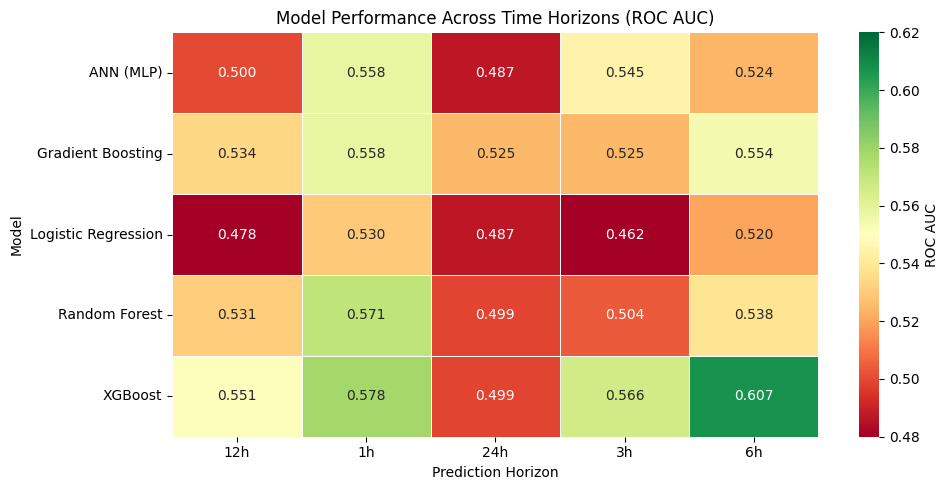

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------
# Manually record results (based on your experiment)
# ------------------------------------------------------
results = [
    # Logistic Regression
    ("Logistic Regression", "1h", 0.530),
    ("Logistic Regression", "3h", 0.462),
    ("Logistic Regression", "6h", 0.520),
    ("Logistic Regression", "12h", 0.478),
    ("Logistic Regression", "24h", 0.487),

    # Random Forest
    ("Random Forest", "1h", 0.571),
    ("Random Forest", "3h", 0.504),
    ("Random Forest", "6h", 0.538),
    ("Random Forest", "12h", 0.531),
    ("Random Forest", "24h", 0.499),

    # Gradient Boosting
    ("Gradient Boosting", "1h", 0.558),
    ("Gradient Boosting", "3h", 0.525),
    ("Gradient Boosting", "6h", 0.554),
    ("Gradient Boosting", "12h", 0.534),
    ("Gradient Boosting", "24h", 0.525),

    # XGBoost (BEST)
    ("XGBoost", "1h", 0.578),
    ("XGBoost", "3h", 0.566),
    ("XGBoost", "6h", 0.607),
    ("XGBoost", "12h", 0.551),
    ("XGBoost", "24h", 0.499),

    # ANN
    ("ANN (MLP)", "1h", 0.558),
    ("ANN (MLP)", "3h", 0.545),
    ("ANN (MLP)", "6h", 0.524),
    ("ANN (MLP)", "12h", 0.500),
    ("ANN (MLP)", "24h", 0.487),
]

df = pd.DataFrame(results, columns=["Model", "Horizon", "ROC_AUC"])

# ------------------------------------------------------
# Pivot into matrix form
# ------------------------------------------------------
matrix = df.pivot(index="Model", columns="Horizon", values="ROC_AUC")

print("\nModel Performance Matrix (ROC AUC):")
display(matrix.round(3))

# ------------------------------------------------------
# Heatmap visualization (for slides)
# ------------------------------------------------------
plt.figure(figsize=(10, 5))
sns.heatmap(
    matrix,
    annot=True,
    fmt=".3f",
    cmap="RdYlGn",
    vmin=0.48,
    vmax=0.62,
    linewidths=0.6,
    cbar_kws={"label": "ROC AUC"}
)

plt.title("Model Performance Across Time Horizons (ROC AUC)")
plt.xlabel("Prediction Horizon")
plt.ylabel("Model")
plt.tight_layout()
plt.show()



Model Performance Matrix (ROC AUC):


Horizon,1h,3h,6h,12h,24h
Model,,,,,
ANN (MLP),0.558,0.545,0.524,0.500,0.487
Gradient Boosting,0.558,0.525,0.554,0.534,0.525
Logistic Regression,0.530,0.462,0.520,0.478,0.487
Random Forest,0.571,0.504,0.538,0.531,0.499
XGBoost,0.578,0.566,0.607,0.551,0.499


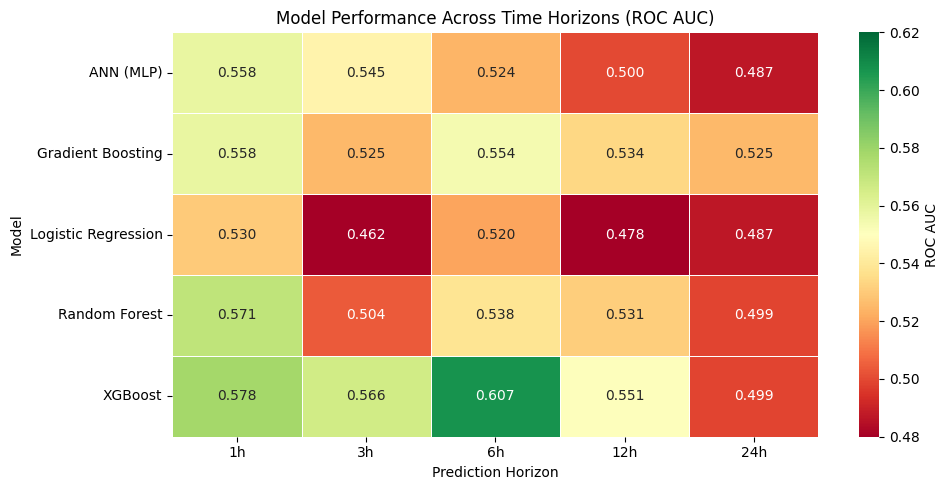

In [ ]:
# Desired chronological order
horizon_order = ["1h", "3h", "6h", "12h", "24h"]

# Reindex columns to enforce order
matrix = matrix.reindex(columns=horizon_order)

print("\nModel Performance Matrix (ROC AUC):")
display(matrix.round(3))

# ------------------------------------------------------
# Heatmap visualization
# ------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.heatmap(
    matrix,
    annot=True,
    fmt=".3f",
    cmap="RdYlGn",
    vmin=0.48,
    vmax=0.62,
    linewidths=0.6,
    cbar_kws={"label": "ROC AUC"}
)

plt.title("Model Performance Across Time Horizons (ROC AUC)")
plt.xlabel("Prediction Horizon")
plt.ylabel("Model")
plt.tight_layout()
plt.show()



Model Performance Matrix (ROC AUC):


Horizon,1h,3h,6h,12h,24h
Model,,,,,
ANN (MLP),0.558,0.545,0.524,0.500,0.487
Gradient Boosting,0.558,0.525,0.554,0.534,0.525
Logistic Regression,0.530,0.462,0.520,0.478,0.487
Random Forest,0.571,0.504,0.538,0.531,0.499
XGBoost,0.578,0.566,0.607,0.551,0.499


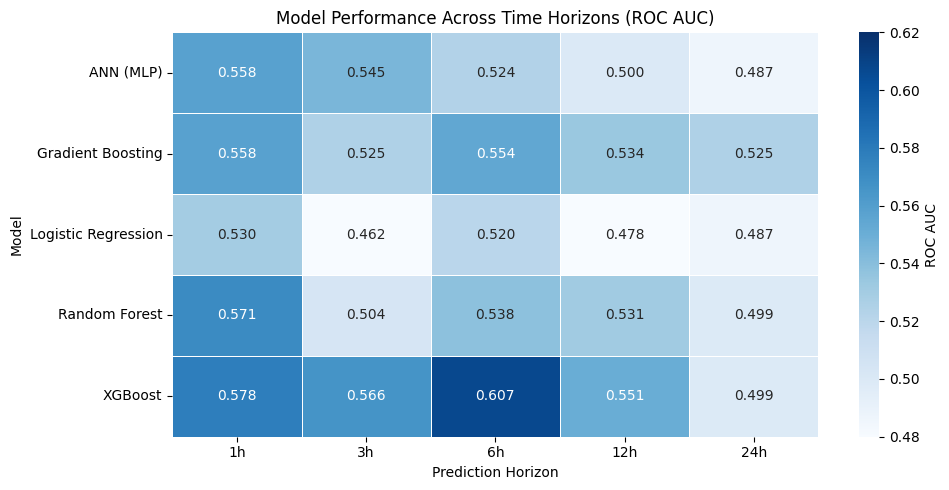

In [ ]:
# Desired chronological order
horizon_order = ["1h", "3h", "6h", "12h", "24h"]

# Enforce column order
matrix = matrix.reindex(columns=horizon_order)

print("\nModel Performance Matrix (ROC AUC):")
display(matrix.round(3))

# ------------------------------------------------------
# Single-color heatmap (sequential)
# ------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.heatmap(
    matrix,
    annot=True,
    fmt=".3f",
    cmap="Blues",          # ✅ single-color palette
    vmin=0.48,
    vmax=0.62,
    linewidths=0.6,
    cbar_kws={"label": "ROC AUC"}
)

plt.title("Model Performance Across Time Horizons (ROC AUC)")
plt.xlabel("Prediction Horizon")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


In [8]:
import os

for root, dirs, files in os.walk("/content/drive/MyDrive/"):
    for f in files:
        if "COIN" in f.upper():
            print(os.path.join(root, f))


/content/drive/MyDrive/Internal Analysis-Coinbase.gdoc
/content/drive/MyDrive/Coinbase Resume.gdoc
/content/drive/MyDrive/Coinbase CoverLetter2.gdoc
/content/drive/MyDrive/COINBASE INTERVIEW PREP.gdoc
/content/drive/MyDrive/Coinbase Interview2.gdoc
/content/drive/MyDrive/COIN_hourly_1y_massive-1.csv
/content/drive/MyDrive/COIN MODEL/Colab Notebooks/COIN.ipynb
/content/drive/MyDrive/COIN MODEL/Colab Notebooks/TEST.COIN.ipynb


In [13]:
import pandas as pd

coin_cols = pd.read_csv("/content/drive/MyDrive/COIN_hourly_1y_massive-1.csv", nrows=5)
btc_cols  = pd.read_csv("/content/drive/MyDrive/BTCUSD_1min_1y_bitstamp.csv", nrows=5)
spy_cols  = pd.read_csv("/content/drive/MyDrive/SPY_hourly_1y_massive.csv", nrows=5)
qqq_cols  = pd.read_csv("/content/drive/MyDrive/QQQ_hourly_1y_massive.csv", nrows=5)

print("COIN Columns:\n", coin_cols.columns, "\n")
print("BTC Columns:\n", btc_cols.columns, "\n")
print("SPY Columns:\n", spy_cols.columns, "\n")
print("QQQ Columns:\n", qqq_cols.columns, "\n")


COIN Columns:
 Index(['window_start', 'open', 'high', 'low', 'close', 'volume',
       'transactions'],
      dtype='object') 

BTC Columns:
 Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'datetime'], dtype='object') 

SPY Columns:
 Index(['window_start', 'open', 'high', 'low', 'close', 'volume',
       'transactions'],
      dtype='object') 

QQQ Columns:
 Index(['window_start', 'open', 'high', 'low', 'close', 'volume',
       'transactions'],
      dtype='object') 

